In this Jupyter Notebook we construct the approximation of real-valued functions in one dimension with the neural network coding scheme using generalized leaky ReLU activations.

self.plcsm_increasing_list: [Sigma_ab_cd(a=1.0, b=0.80088125, c=0.0, d=0.099609375), Sigma_ab_cd(a=1.0, b=1.0, c=0.2998296875, d=0.2998296875), Sigma_ab_cd(a=1.0, b=0.9951225603046644, c=0.50005, d=0.50005)]
self.plcsm_decreasing_list: [Sigma_ab_cd(a=1.0, b=0.0001, c=0.0, d=0.0), Sigma_ab_cd(a=1.0, b=1.0, c=2.5e-05, d=2.5e-05), Sigma_ab_cd(a=1.0, b=1.0, c=5e-05, d=5e-05), Negate()]


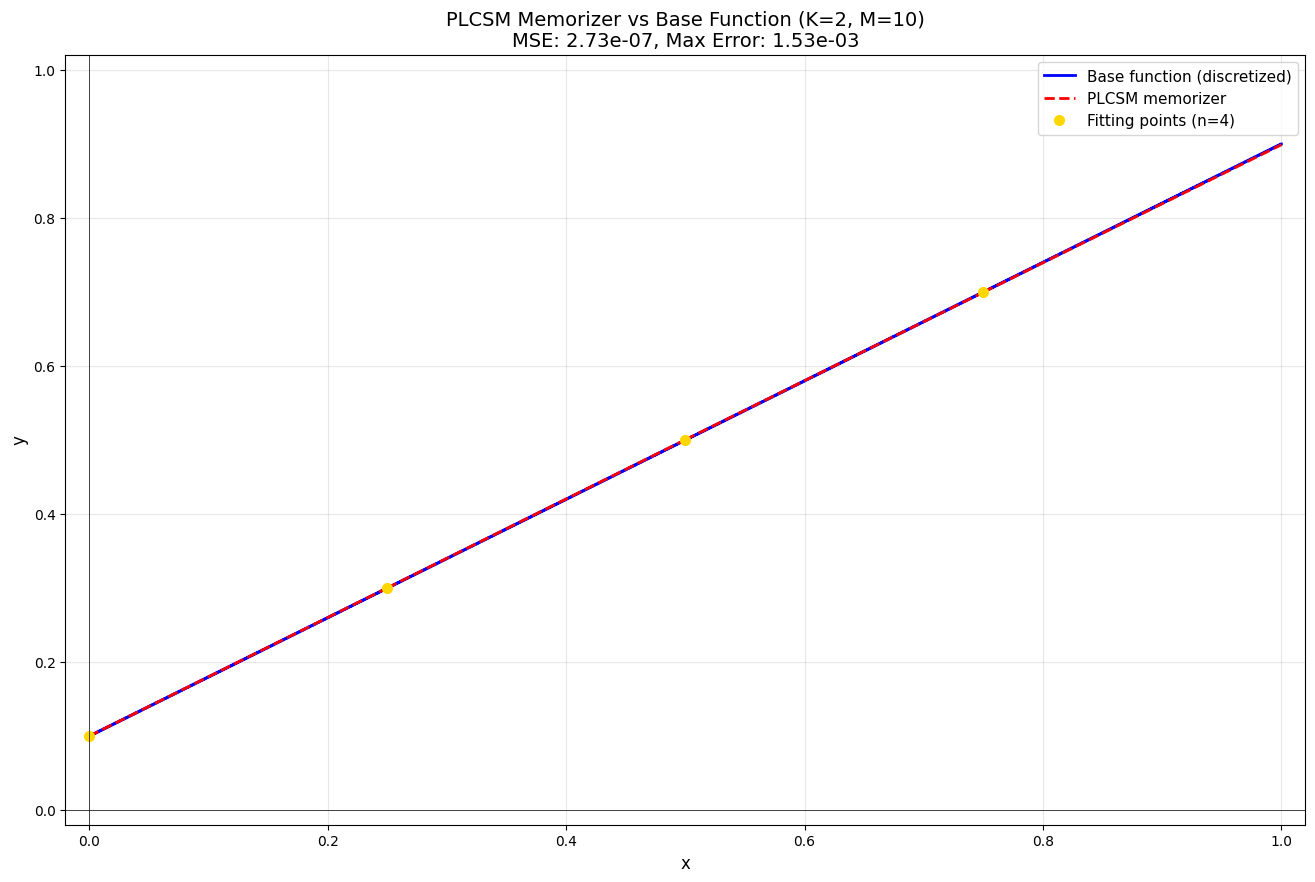

self.plcsm_increasing_list: [Sigma_ab_cd(a=1.0, b=0.01, c=0.0, d=0.0703125), Sigma_ab_cd(a=1.0, b=1.0, c=0.0715625, d=0.0715625), Sigma_ab_cd(a=1.0, b=10.375, c=0.0728125, d=0.0728125), Sigma_ab_cd(a=1.0, b=4.313253012048193, c=0.08578125, d=0.08578125), Sigma_ab_cd(a=1.0, b=2.047486033519553, c=0.14171875, d=0.14171875), Sigma_ab_cd(a=1.0, b=1.5798090040927695, c=0.25625, d=0.25625), Sigma_ab_cd(a=1.0, b=1.3886010362694299, c=0.43718749999999995, d=0.43718749999999995)]
self.plcsm_decreasing_list: [Sigma_ab_cd(a=1.0, b=0.26, c=0.0, d=0.0), Sigma_ab_cd(a=1.0, b=0.639423076923077, c=0.0325, d=0.0325), Sigma_ab_cd(a=1.0, b=0.06015037593984962, c=0.05328125, d=0.05328125), Sigma_ab_cd(a=1.0, b=1.0, c=0.05453125, d=0.05453125), Sigma_ab_cd(a=1.0, b=1.0, c=0.055781250000000004, d=0.055781250000000004), Sigma_ab_cd(a=1.0, b=1.0, c=0.057031250000000006, d=0.057031250000000006), Sigma_ab_cd(a=1.0, b=1.0, c=0.05828125000000001, d=0.05828125000000001), Negate()]


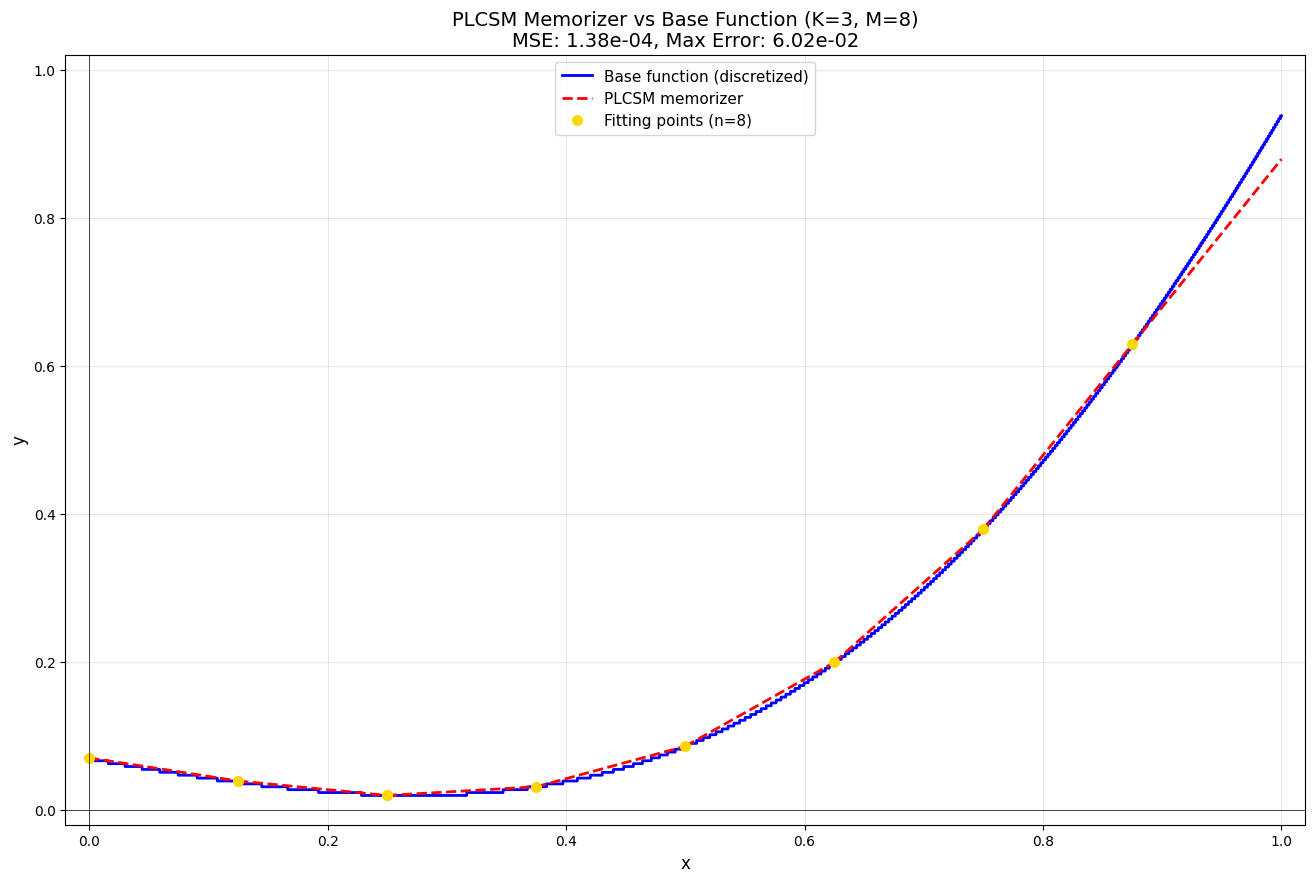

In [2]:
import torch
import matplotlib.pyplot as plt
from coding_scheme_base_functions import (Sigma_ab_cd, EncoderApprox1D, ZigZagMemorizer, CodingScheme1D, EncoderSupApprox1D, PLCSMMemorizer)

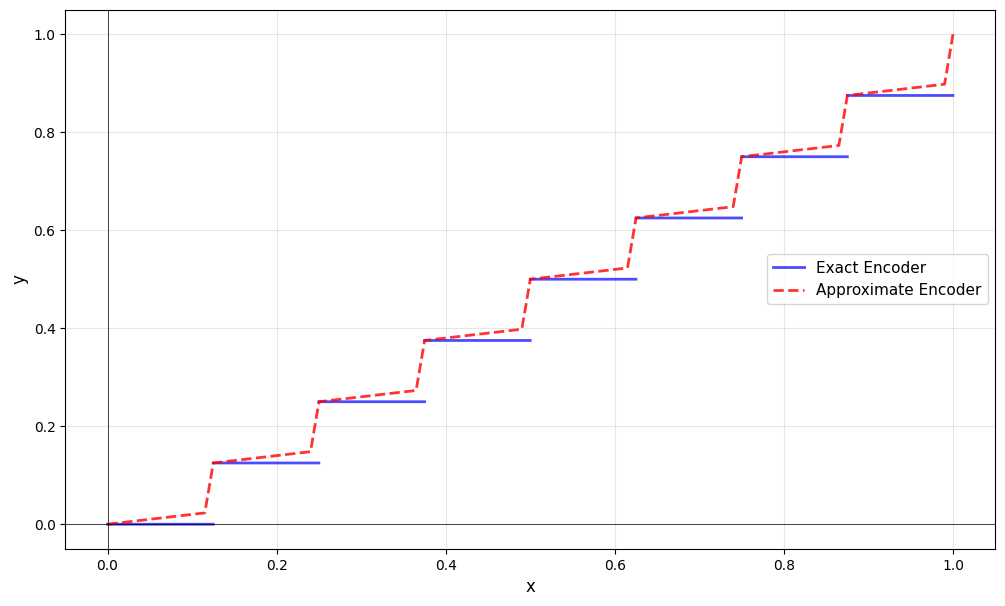

(0.000670381188908942, 0.12499999999999445)

In [ ]:
encoder_sup = EncoderApprox1D(K=3, flat_slope=2*1e-1, beta=1e-2, dtype=torch.float64, device="cpu")
save_path = "./plots/encodersupapprox_1D_K3_slope1e-5.pdf"
encoder_sup.plot_with_exact(show_title=False)

In [3]:
# set the device and dtype (torch.float64 is recommended for precision) of your choice
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float64

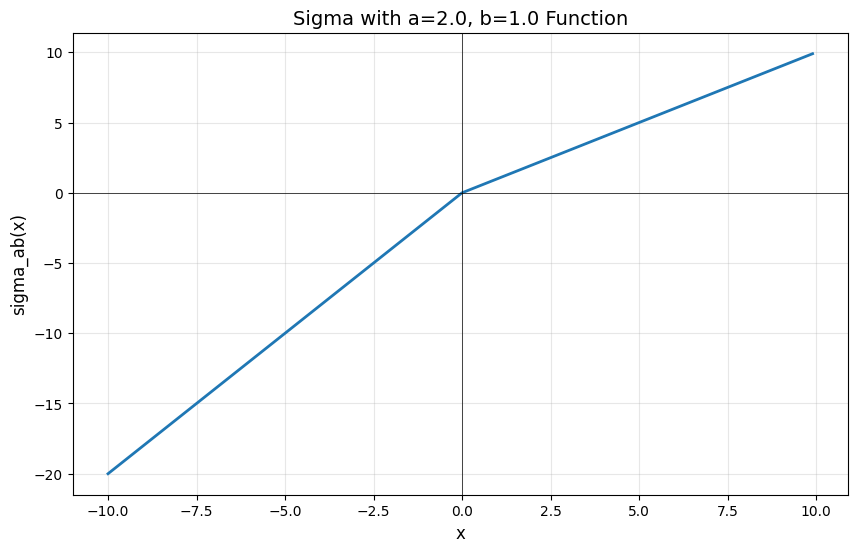

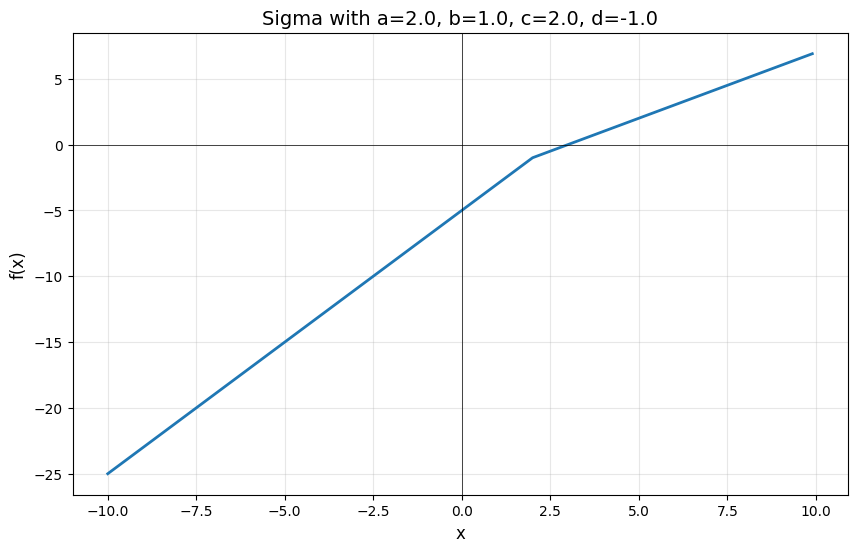

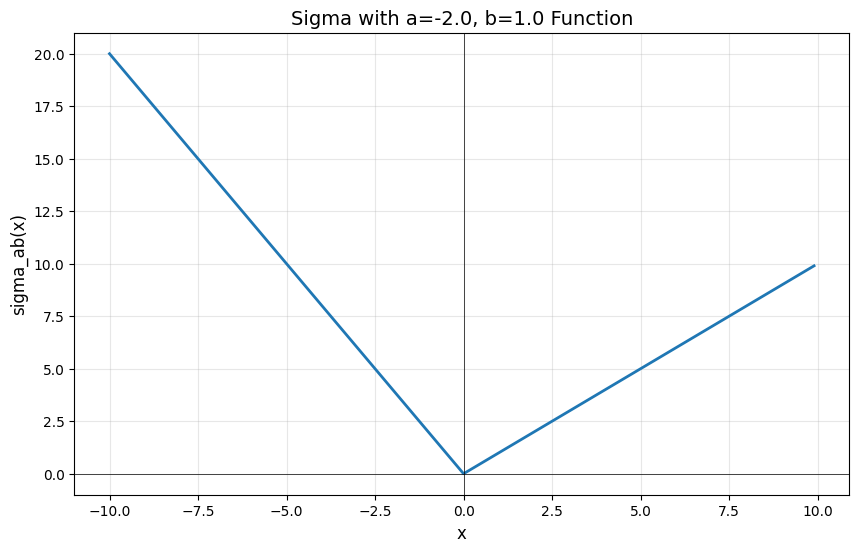

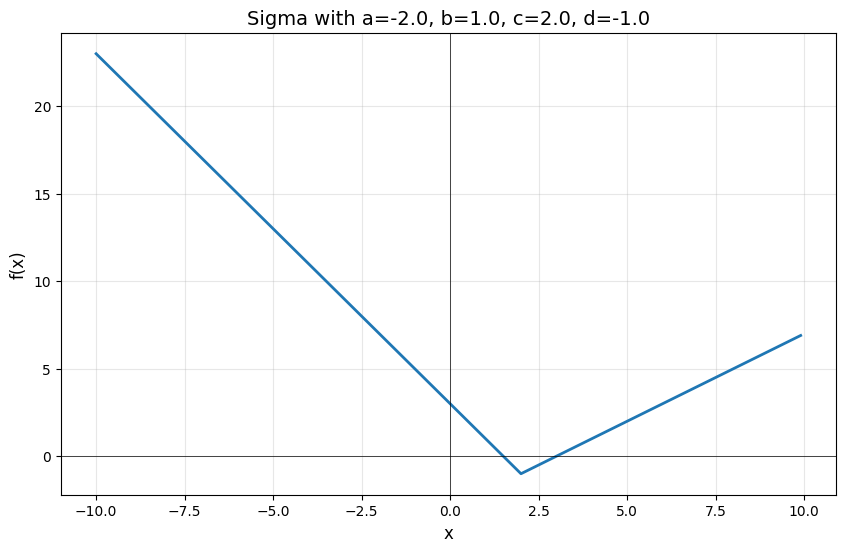

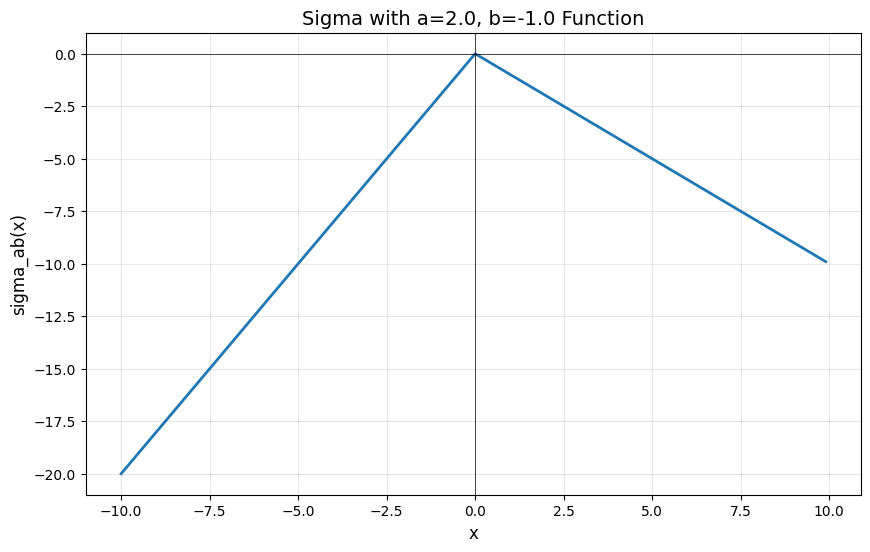

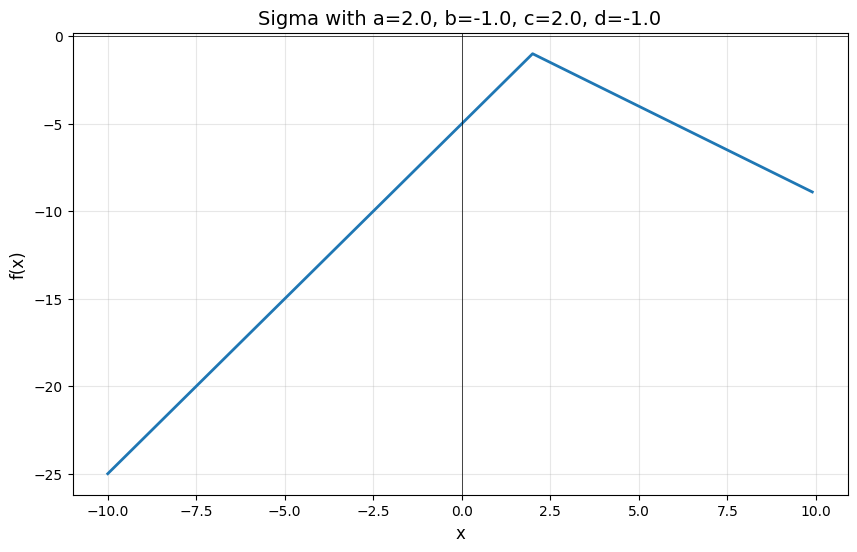

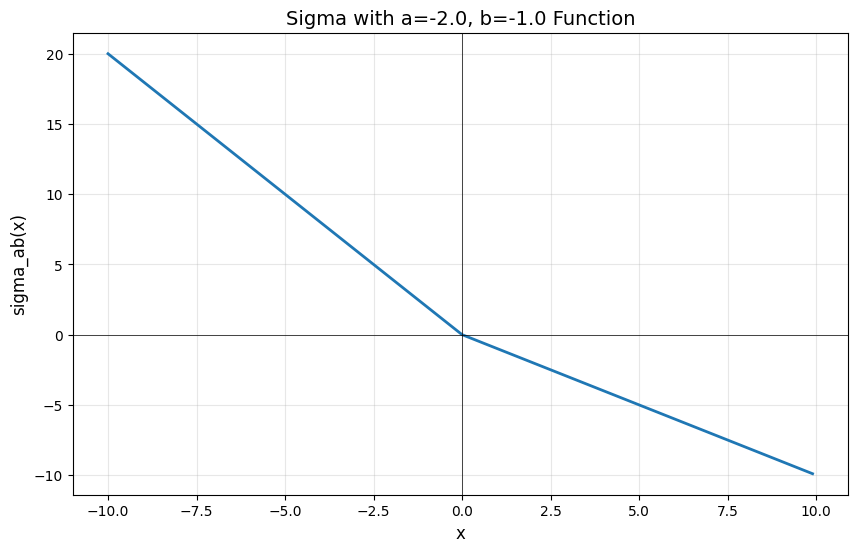

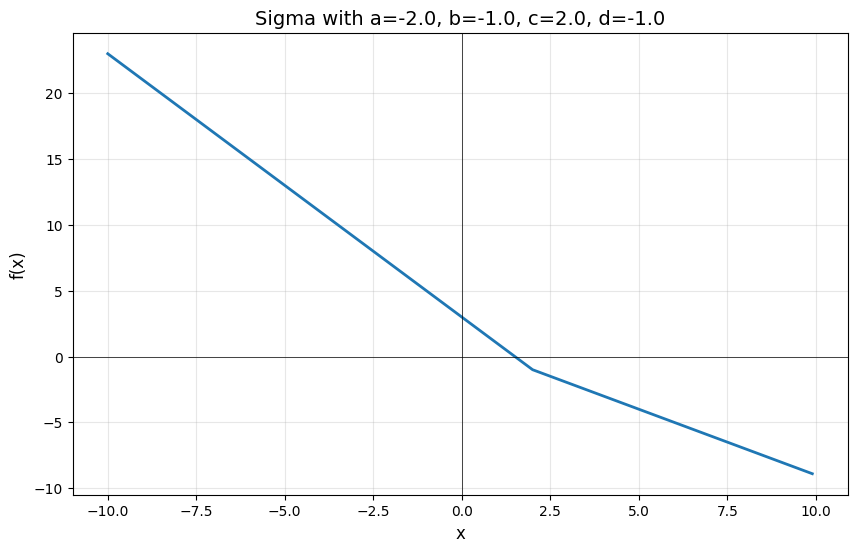

In [4]:
c, d = 2, -1
# a>0, b>0
a, b = 2, 1
sigma = Sigma_ab_cd(a, b, c, d, dtype=dtype, device=device)
points = torch.arange(-10, 10, 0.1)
# plot sigma_ab (pass points parameter)
sigma.plot_sigma_ab(points)
# plot sigma_ab_cd (use plot_sigma method instead)
sigma.plot_sigma(points)

# a<0, b>0
a, b = -2, 1
sigma = Sigma_ab_cd(a, b, c, d, dtype=dtype, device=device)
points = torch.arange(-10, 10, 0.1)
# plot sigma_ab (pass points parameter)
sigma.plot_sigma_ab(points)
# plot sigma_ab_cd (use plot_sigma method instead)
sigma.plot_sigma(points)

# a>0, b<0
a, b = 2, -1
sigma = Sigma_ab_cd(a, b, c, d, dtype=dtype, device=device)
points = torch.arange(-10, 10, 0.1)
# plot sigma_ab (pass points parameter)
sigma.plot_sigma_ab(points)
# plot sigma_ab_cd (use plot_sigma method instead)
sigma.plot_sigma(points)

# a<0, b<0
a, b = -2, -1
sigma = Sigma_ab_cd(a, b, c, d, dtype=dtype, device=device)
points = torch.arange(-10, 10, 0.1)
# plot sigma_ab (pass points parameter)
sigma.plot_sigma_ab(points)
# plot sigma_ab_cd (use plot_sigma method instead)
sigma.plot_sigma(points)

Now that we've verified that our $\sigma_{a,b}^{c,d}$ functions work as expected, we can test out the functionality of the encoder approximation, which is again build as a composition of leaky ReLUs. Note that the number of composed leaky ReLUs scales exponentially with the discretization constant \(K) and that the constructions precision might suffer if flat_slope and \(\gamma) get very small. However, the construction will only converge if flat_slope and \(\gamma\) get lowered to (almost) zero and \(K) can arbitrarily large. These circumstances already imply that this construction won't be able to achieve arbitrarily precise approximations of the encoder due to exponential runtime growth with large \(K) and as the either very small or large slopes corresponding to flat_slope and \(\gamma\) will lead to underflows or overflows at some point. To hopefully achieve the construction in a relatively precise manner for parameters of decent magnitudes, we use torch.float64 by default.

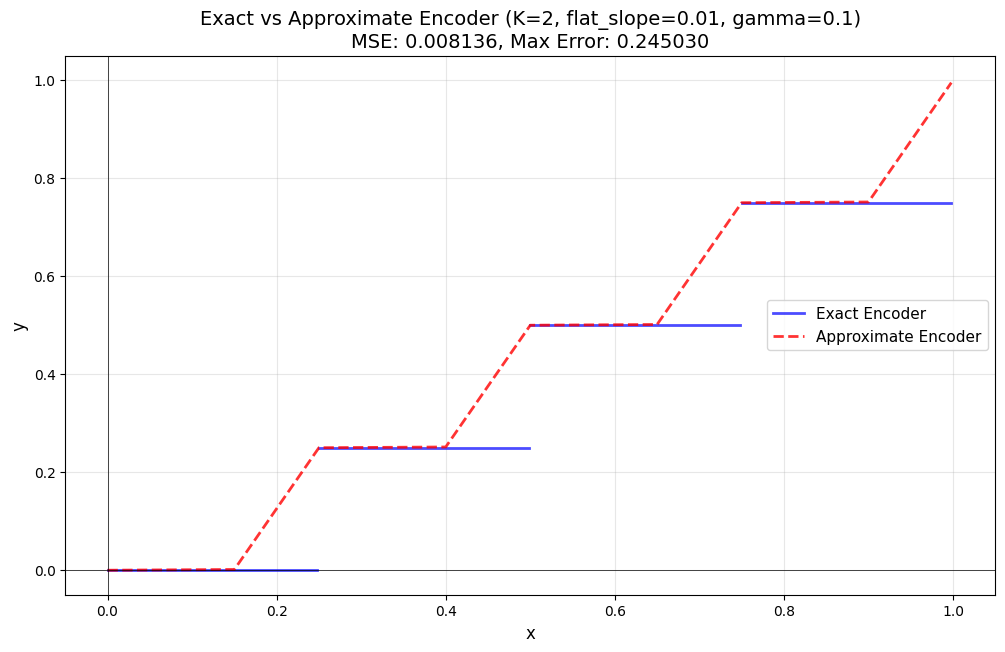

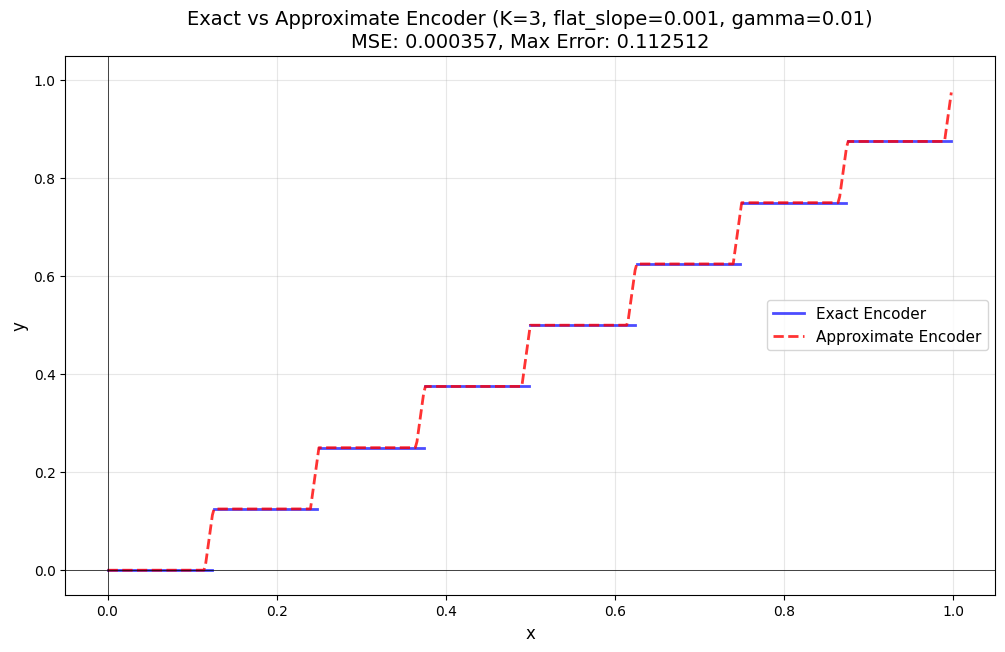

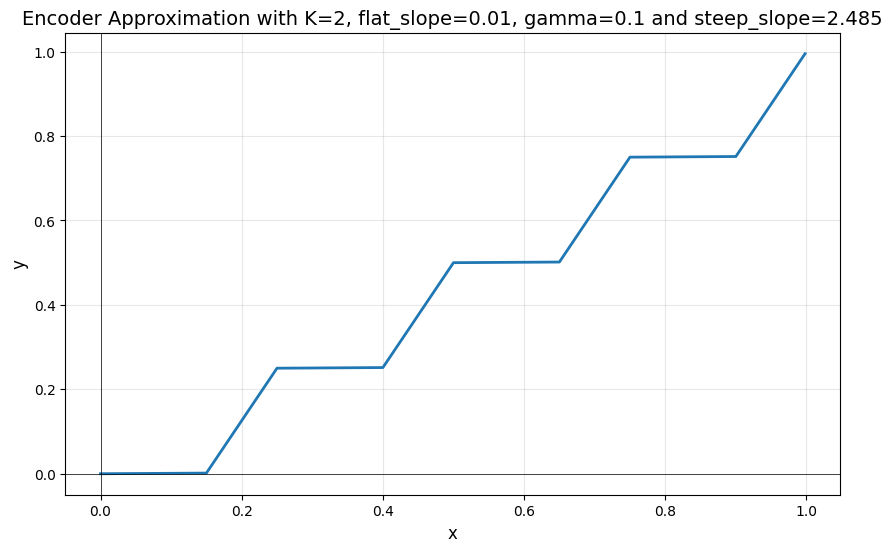

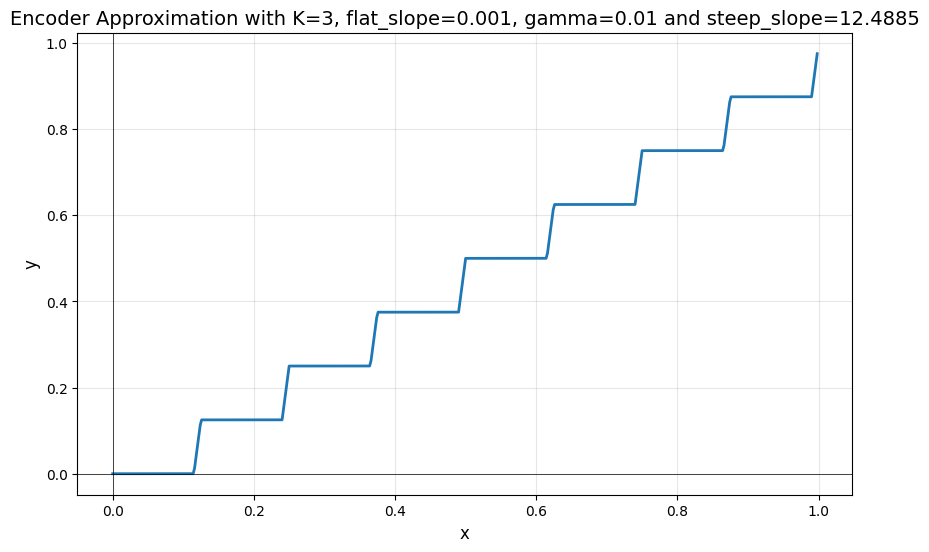

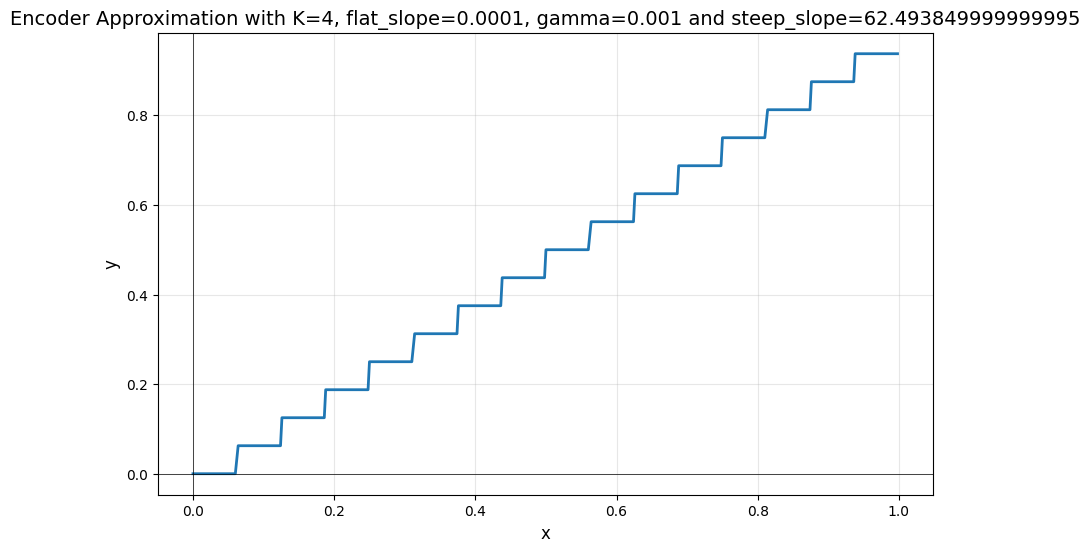

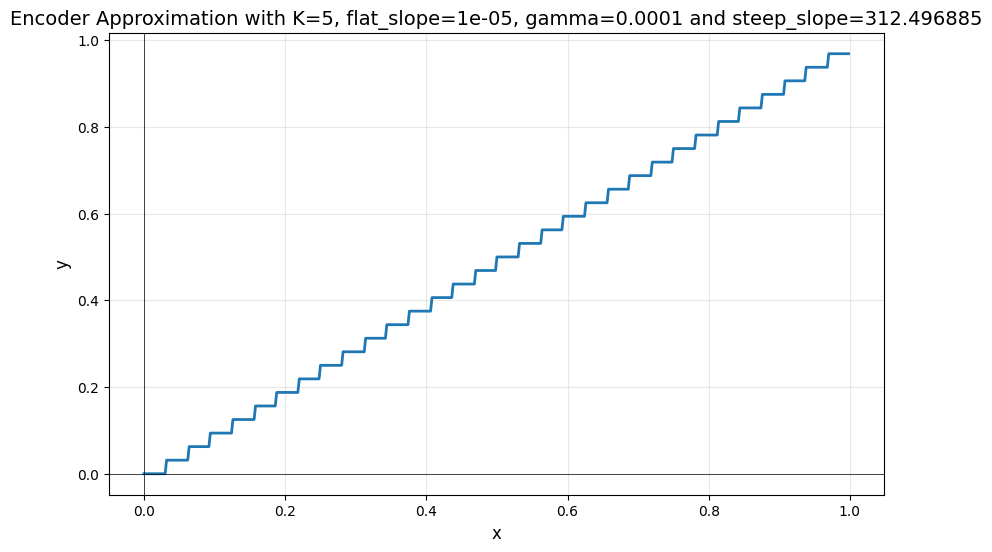

In [5]:
# create encoders with increasingly large K and decaying float_slope and gamma and plot them on the interval of interest [0,1]
encoder1 = EncoderApprox1D(K=2, gamma=0.1, flat_slope=1e-2, dtype=dtype, device=device)
encoder2 = EncoderApprox1D(K=3, gamma=0.01, flat_slope=1e-3, dtype=dtype, device=device)
encoder3 = EncoderApprox1D(K=4, gamma=0.001, flat_slope=1e-4, dtype=dtype, device=device)
encoder4 = EncoderApprox1D(K=5, gamma=0.0001, flat_slope=1e-5, dtype=dtype, device=device)

# plot encoders
points = torch.arange(0, 1, 0.002, dtype=dtype, device=device)
encoder1.plot_with_exact(points)
encoder2.plot_with_exact(points)
encoder1.plot(points)
encoder2.plot(points)
encoder3.plot(points)
encoder4.plot(points)

As we've now seen that the construction of the encoder works accordingly, we can take a look at the zig-zag functions that are supposed to fit a given function f exactly on finitely many given points. For this and the overall approximation we define several functions to be exactly fitted by the zig-zag function and the entire coding scheme. We select them in such a way that they contain both non-monotonic and discontinuous functions. It should be noted that it is impossible to approximate a non-monotonic function using a composition of monotonic functions, since the result will always be monotonic. Furthermore, the most popular choices tend to be monotonic activations.

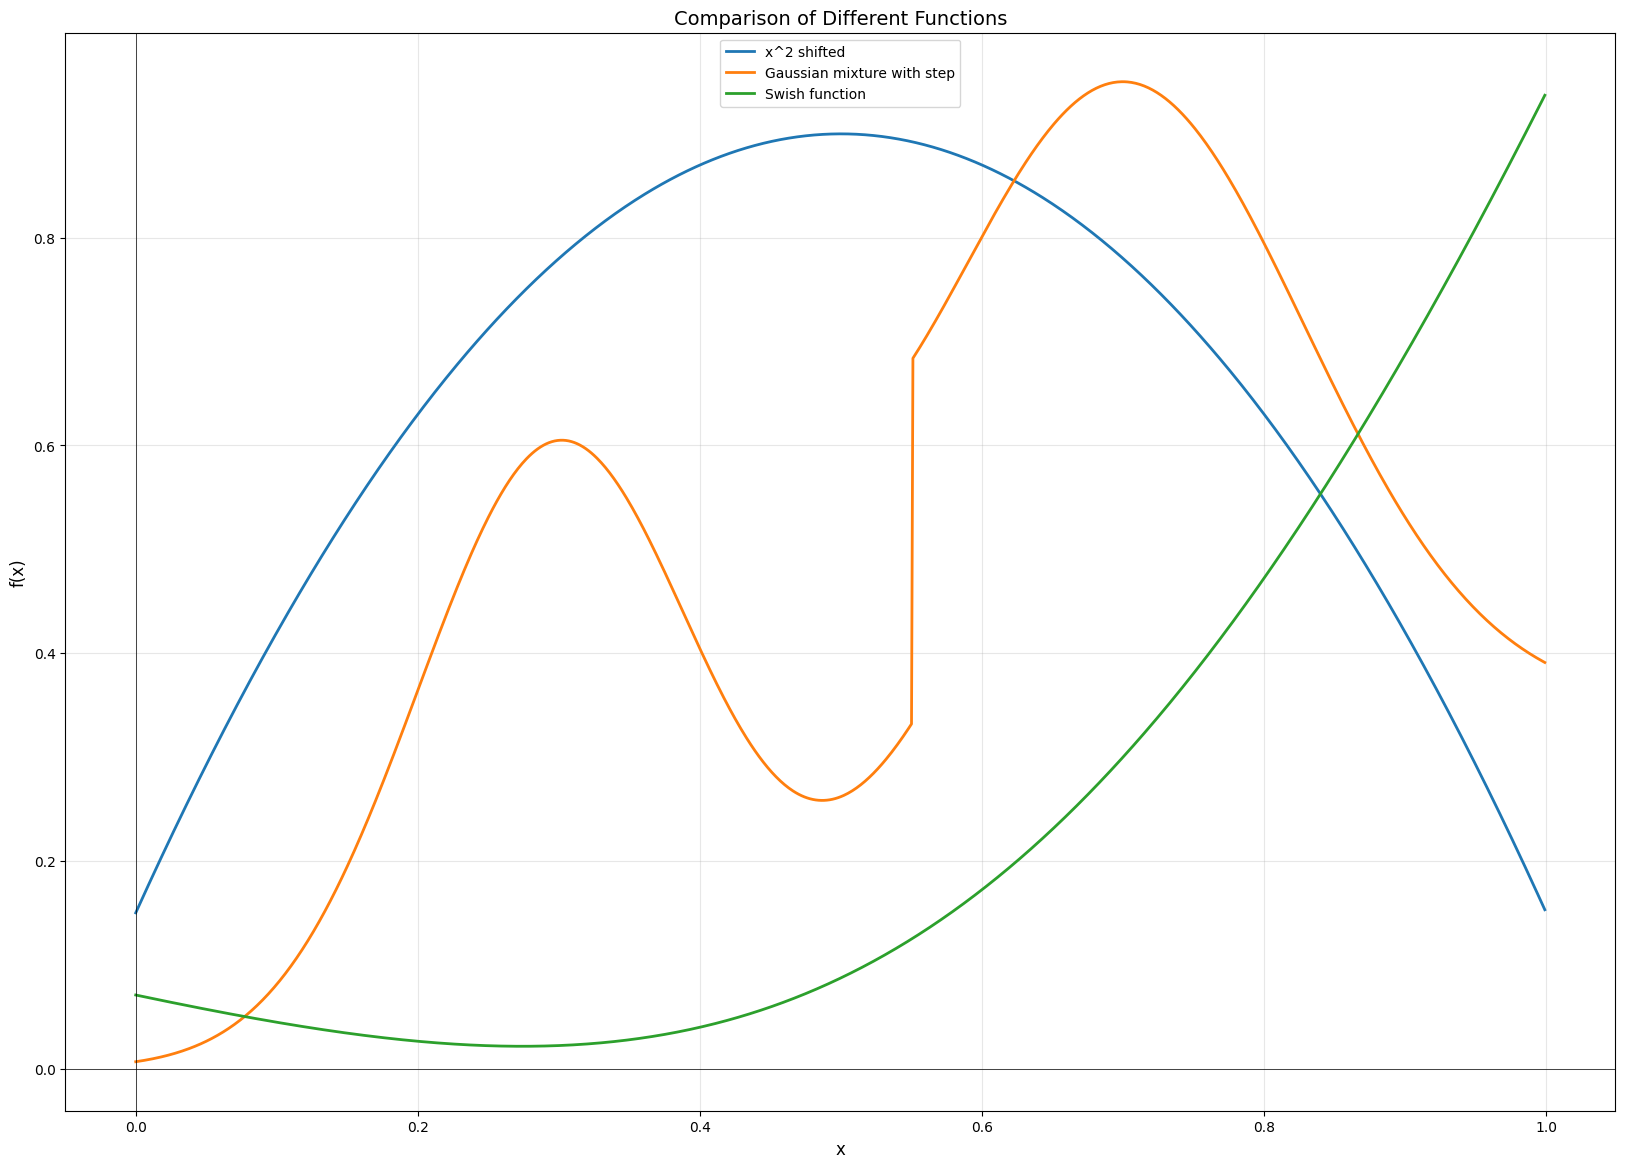

In [6]:
def squared_shifted(x):
    return -3 * (x - 0.5) ** 2 + 0.9

def gaussian_mixture_with_step(x):
    return 0.6 * torch.exp(-50 * (x - 0.3) ** 2) + 0.6 * torch.exp(-30 * (x - 0.7) ** 2) + 0.35 * (x > 0.55).double()

def swish_shifted(x):
    return 3 * (x - 0.7) * torch.sigmoid(3 * (x - 0.7)) + 0.3

# we plot the functions for a clearer view
points = torch.arange(0, 1, 0.001, dtype=dtype, device=device)
plt.figure(figsize=(20, 14))
plt.plot(points.cpu().numpy(), squared_shifted(points).cpu().numpy(), label='x^2 shifted', linewidth=2)
plt.plot(points.cpu().numpy(), gaussian_mixture_with_step(points).cpu().numpy(), label='Gaussian mixture with step', linewidth=2)
plt.plot(points.cpu().numpy(), swish_shifted(points).cpu().numpy(), label='Swish function', linewidth=2)
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Comparison of Different Functions', fontsize=14)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.legend()
plt.show()


We show how the zig-zag functions would look that fit these functions exactly. To increase the understanding we start with only a few points and increase the number of points to perfectly fit.

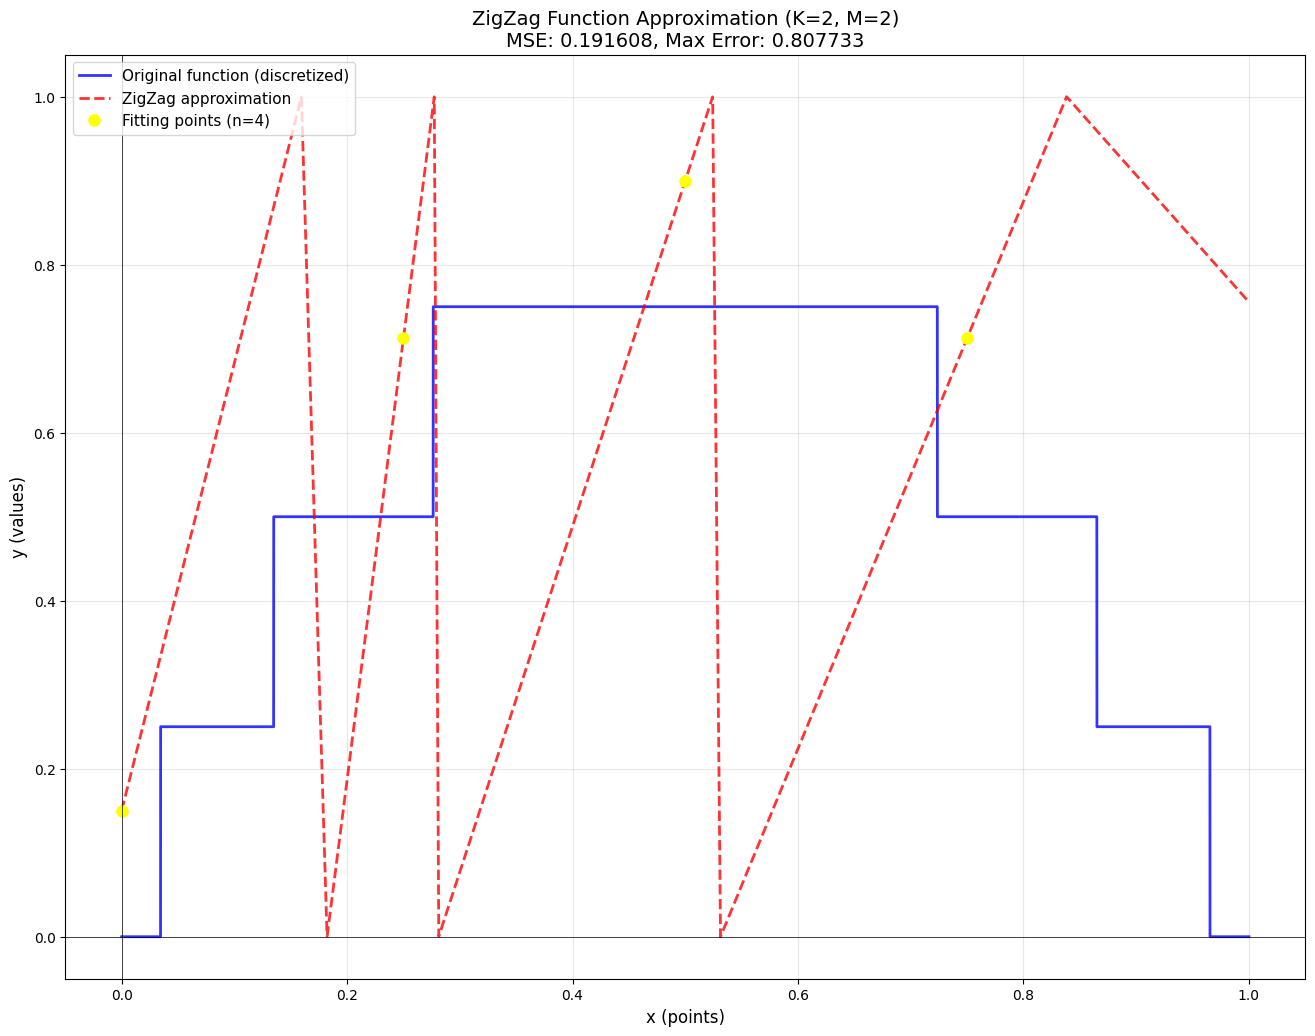

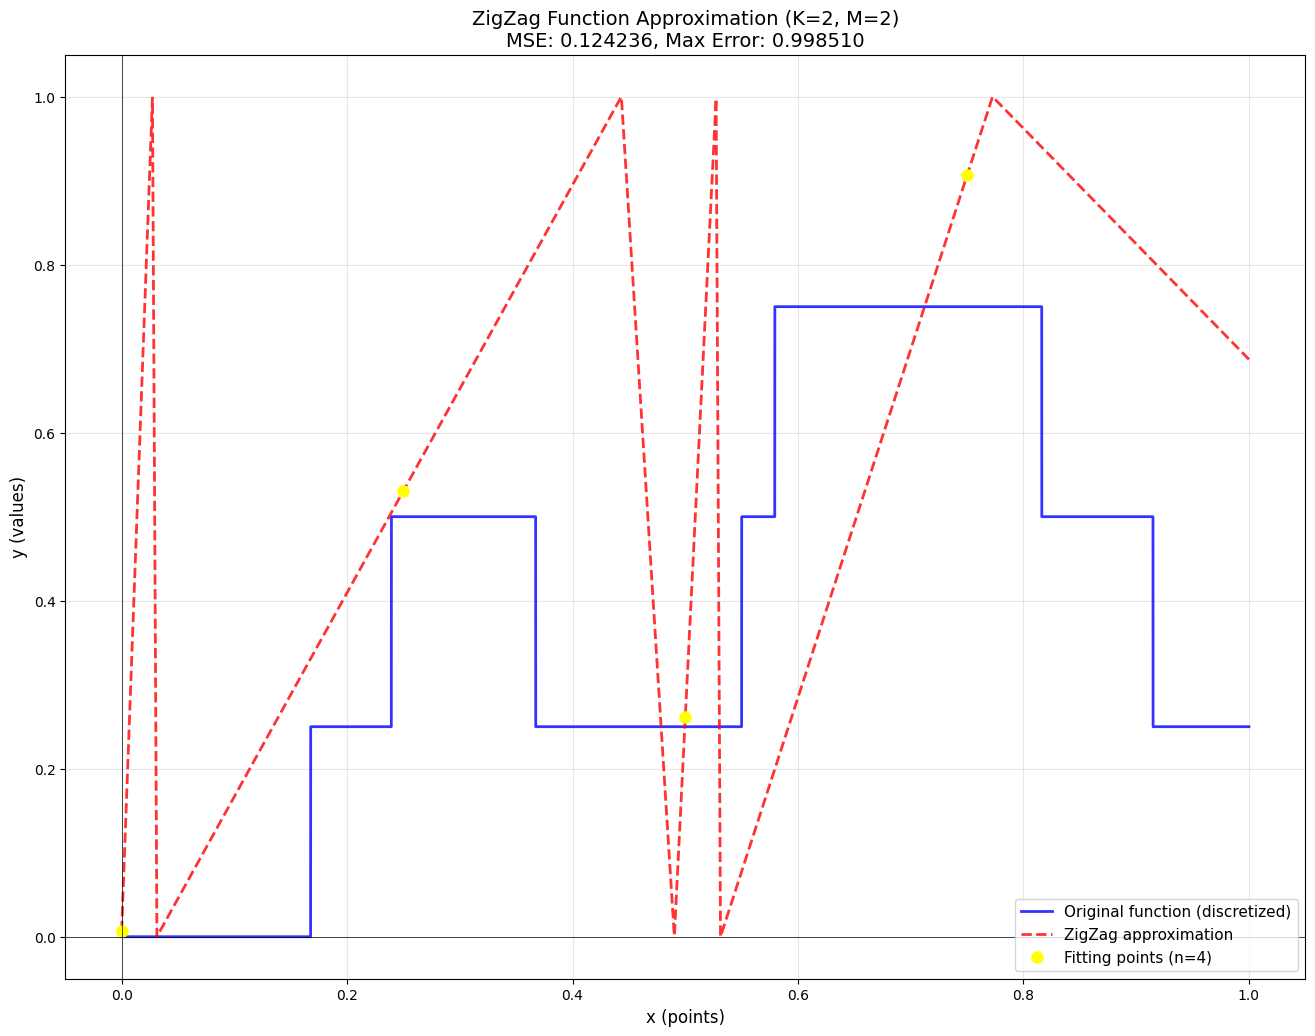

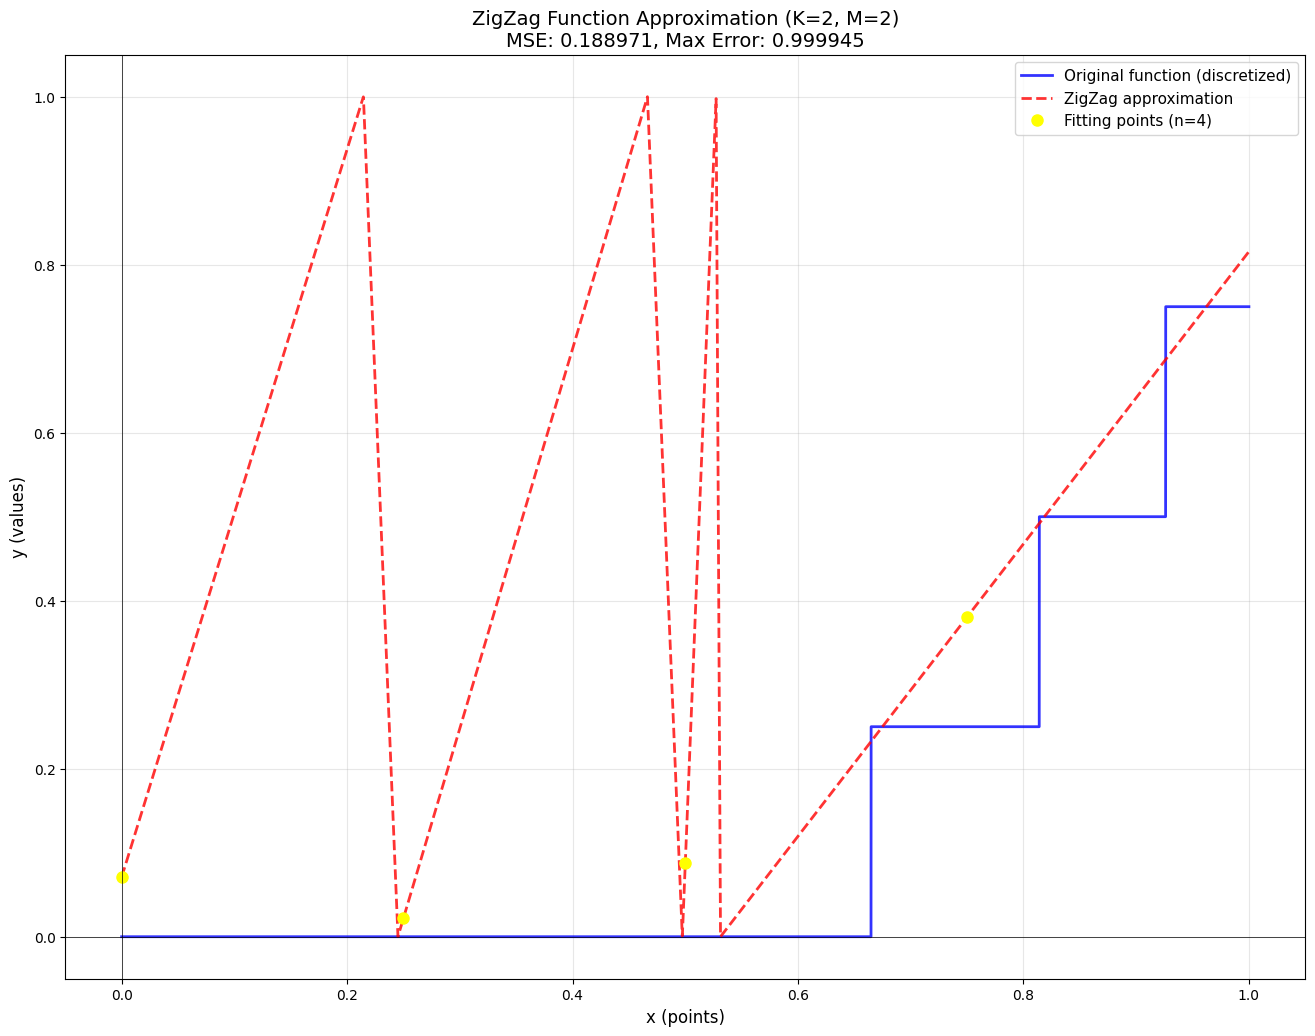

In [7]:
zig_zag_squared = ZigZagMemorizer(squared_shifted, K=2, M=2, dtype=dtype, device=device)
zig_zag_squared.dtype
zig_zag_gaussian = ZigZagMemorizer(gaussian_mixture_with_step, K=2, M=2, dtype=dtype, device=device)
zig_zag_swish = ZigZagMemorizer(swish_shifted, K=2, M=2, dtype=dtype, device=device)

# plot the zig-zag functions
zig_zag_squared.plot()
zig_zag_gaussian.plot()
zig_zag_swish.plot()

self.plcsm_increasing_list: [Sigma_ab_cd(a=1.0, b=0.1, c=0.0, d=1.0), Sigma_ab_cd(a=1.0, b=1.0, c=1.0125, d=1.0125), Sigma_ab_cd(a=1.0, b=1.0, c=1.025, d=1.025), Sigma_ab_cd(a=1.0, b=1.0, c=1.0374999999999999, d=1.0374999999999999), Sigma_ab_cd(a=1.0, b=1.0, c=1.0499999999999998, d=1.0499999999999998), Sigma_ab_cd(a=1.0, b=1.0, c=1.0624999999999998, d=1.0624999999999998), Sigma_ab_cd(a=1.0, b=1.0, c=1.0749999999999997, d=1.0749999999999997)]
self.plcsm_decreasing_list: [Sigma_ab_cd(a=1.0, b=0.115625, c=0.0, d=0.0), Sigma_ab_cd(a=1.0, b=1.8108108108108107, c=0.014453125, d=0.014453125), Sigma_ab_cd(a=1.0, b=1.8955223880597014, c=0.040625, d=0.040625), Sigma_ab_cd(a=1.0, b=1.7086614173228347, c=0.090234375, d=0.090234375), Sigma_ab_cd(a=1.0, b=1.5529953917050694, c=0.175, d=0.175), Sigma_ab_cd(a=1.0, b=1.4451038575667656, c=0.306640625, d=0.306640625), Sigma_ab_cd(a=1.0, b=1.3696098562628336, c=0.496875, d=0.496875), Negate()]


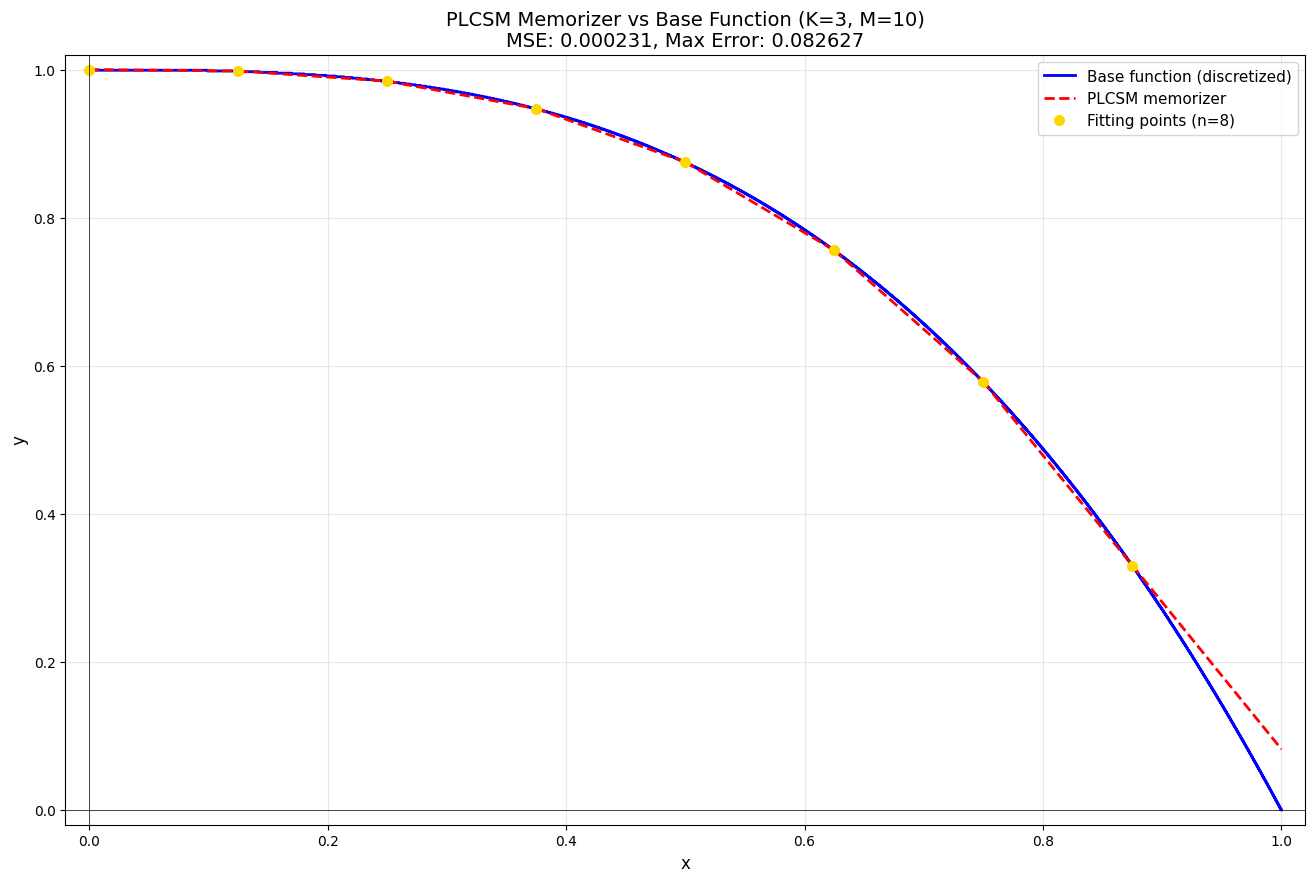

self.plcsm_increasing_list: [Sigma_ab_cd(a=1.0, b=0.994375, c=0.0, d=0.005859375), Sigma_ab_cd(a=1.0, b=3.2391577624135763, c=0.13015625, d=0.13015625), Sigma_ab_cd(a=1.0, b=0.0031046861356359757, c=0.5327734375, d=0.5327734375), Sigma_ab_cd(a=1.0, b=1.0, c=0.5340234374999999, d=0.5340234374999999), Sigma_ab_cd(a=1.0, b=479.12499999999994, c=0.5352734374999999, d=0.5352734374999999), Sigma_ab_cd(a=1.0, b=0.08035481346204018, c=1.1341796874999999, d=1.1341796874999999), Sigma_ab_cd(a=1.0, b=0.025974025974025976, c=1.1823046874999998, d=1.1823046874999998)]
self.plcsm_decreasing_list: [Sigma_ab_cd(a=1.0, b=0.01, c=0.0, d=0.0), Sigma_ab_cd(a=1.0, b=1.0, c=0.00125, d=0.00125), Sigma_ab_cd(a=1.0, b=43.1875, c=0.0025, d=0.0025), Sigma_ab_cd(a=1.0, b=4.020984081041968, c=0.056484375, d=0.056484375), Sigma_ab_cd(a=1.0, b=0.005758502789274789, c=0.2735546875, d=0.2735546875), Sigma_ab_cd(a=1.0, b=1.0, c=0.2748046875, d=0.2748046875), Sigma_ab_cd(a=1.0, b=254.90624999999997, c=0.2760546874999999

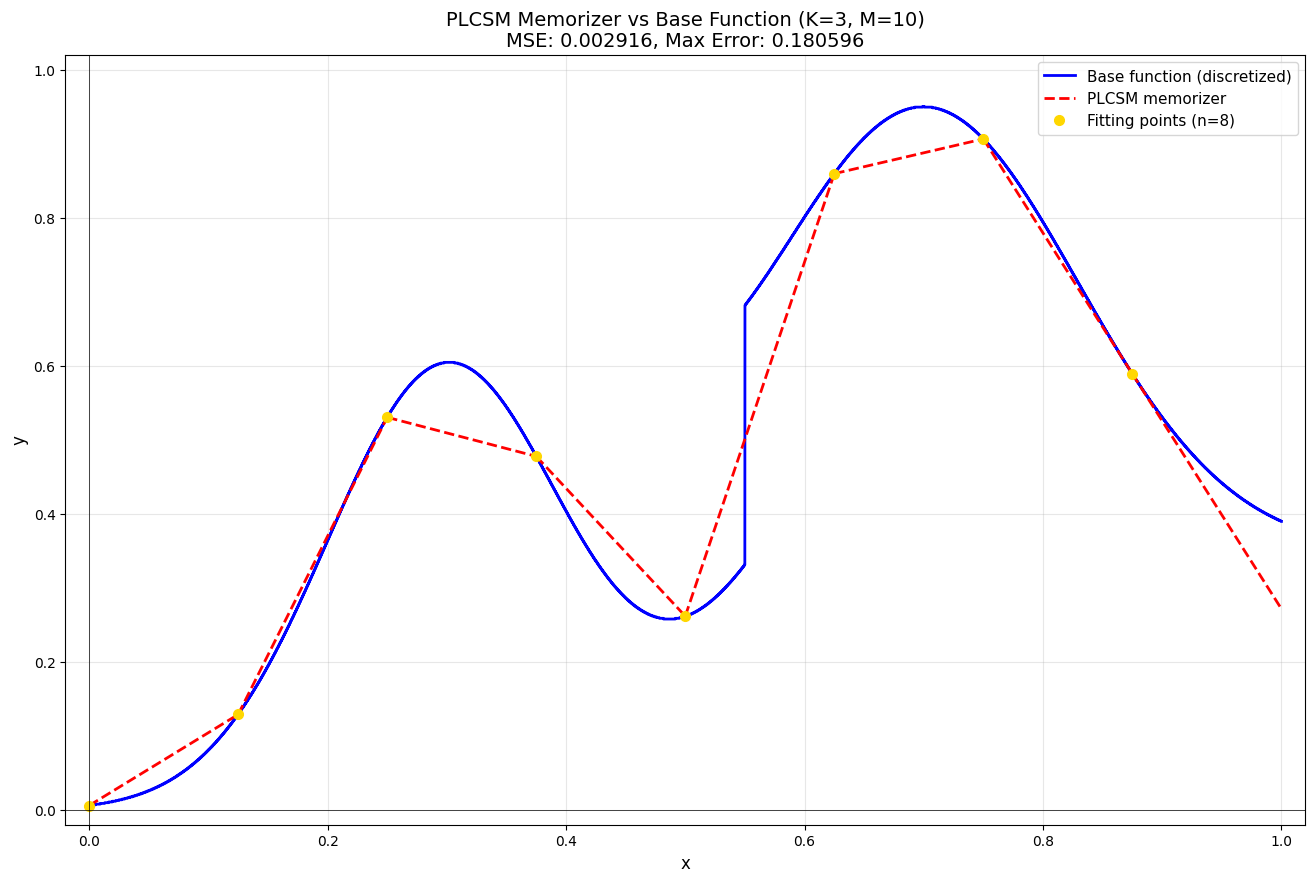

self.plcsm_increasing_list: [Sigma_ab_cd(a=1.0, b=0.01, c=0.0, d=0.0703125), Sigma_ab_cd(a=1.0, b=1.0, c=0.0715625, d=0.0715625), Sigma_ab_cd(a=1.0, b=9.59375, c=0.0728125, d=0.0728125), Sigma_ab_cd(a=1.0, b=4.664495114006515, c=0.0848046875, d=0.0848046875), Sigma_ab_cd(a=1.0, b=2.030027932960894, c=0.1407421875, d=0.1407421875), Sigma_ab_cd(a=1.0, b=1.6019951840385276, c=0.254296875, d=0.254296875), Sigma_ab_cd(a=1.0, b=1.3757783981103713, c=0.43621093749999995, d=0.43621093749999995)]
self.plcsm_decreasing_list: [Sigma_ab_cd(a=1.0, b=0.26, c=0.0, d=0.0), Sigma_ab_cd(a=1.0, b=0.5793269230769231, c=0.0325, d=0.0325), Sigma_ab_cd(a=1.0, b=0.06639004149377593, c=0.051328125, d=0.051328125), Sigma_ab_cd(a=1.0, b=1.0, c=0.052578125, d=0.052578125), Sigma_ab_cd(a=1.0, b=1.0, c=0.053828125000000004, d=0.053828125000000004), Sigma_ab_cd(a=1.0, b=1.0, c=0.055078125000000006, d=0.055078125000000006), Sigma_ab_cd(a=1.0, b=1.0, c=0.05632812500000001, d=0.05632812500000001), Negate()]


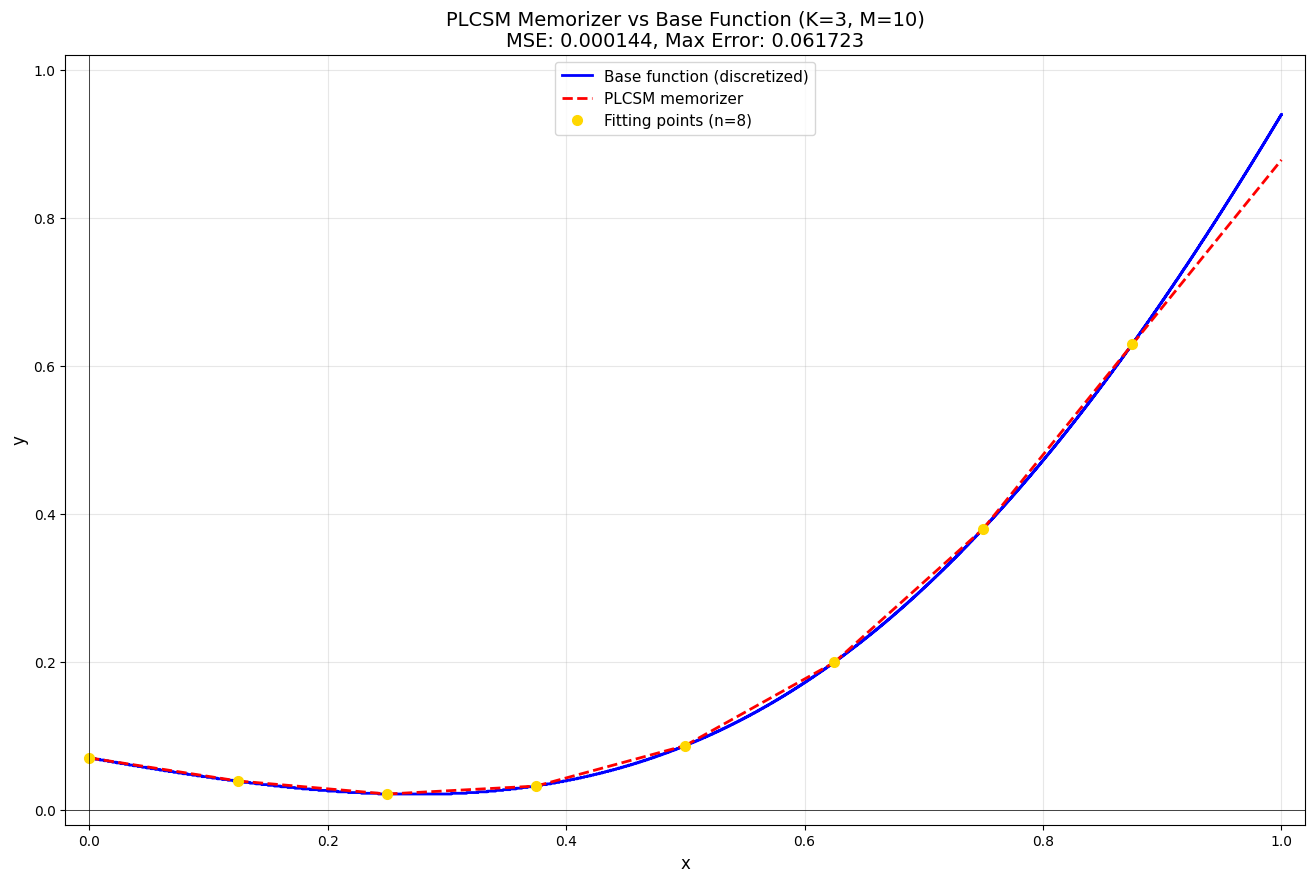

In [8]:
def linear(x):
    return -x**3 + 1.0

linear_memorizer = PLCSMMemorizer(linear, flat_slope = 0.1, K=3, M=10, dtype=dtype, device=device)
linear_memorizer.plot_with_base_function()

gaussian_mixture_memorizer = PLCSMMemorizer(gaussian_mixture_with_step, K=3, M=10, flat_slope=1e-2, dtype=dtype, device=device)
gaussian_mixture_memorizer.plot_with_base_function()
swish_memorizer_plcsm = PLCSMMemorizer(swish_shifted, K=3, M=10, flat_slope=1e-2, dtype=dtype, device=device)
swish_memorizer_plcsm.plot_with_base_function()

Note that in 1D, the entire coding scheme is just given by the encoder composed with the zig-zag function, as the decoder is just the identity in this case. We compute the CodingScheme1D for each of the functions and show that the approximation gets more accurate if flat_slope and \(\gamma) are decreased, or if \(K, M\) are increased. However, note that for \(\gamma) or flat_slope smaller than \(1e-6) leads to numerical instabilities and overflows due to large magnitudes of the zig-zag slopes, resulting in faulty graphs and results. Moreover, as the number of function compositions of the coding scheme grows exponentially with \(K\), values of \(K\) larger than \(10) or \(11\) already lead to significant runtime explosions. 

\\~\\Also it is important to note that we obtain the plots via matplotlib plot, which just connects values of the function on many points. However, as the behavior of the coding scheme can get extreme and the size of the exception intervals very small, these can not be appropriately plottet for very small \(\gamma\), even though we plot 1e6 points in this case.

self.plcsm_increasing_list: [Sigma_ab_cd(a=1.0, b=2.01, c=0.0, d=0.0), Sigma_ab_cd(a=1.0, b=0.5024875621890548, c=0.5025, d=0.5025), Sigma_ab_cd(a=1.0, b=0.009900990099009901, c=0.7549999999999999, d=0.7549999999999999)]
self.plcsm_decreasing_list: [Sigma_ab_cd(a=1.0, b=0.01, c=0.0, d=0.0), Sigma_ab_cd(a=1.0, b=1.0, c=0.0025, d=0.0025), Sigma_ab_cd(a=1.0, b=101.0, c=0.005, d=0.005), Negate()]
self.plcsm_increasing_list: [Sigma_ab_cd(a=1.0, b=2.01, c=0.0, d=0.0), Sigma_ab_cd(a=1.0, b=0.0049751243781094535, c=0.5025, d=0.5025), Sigma_ab_cd(a=1.0, b=200.99999999999997, c=0.5049999999999999, d=0.5049999999999999)]
self.plcsm_decreasing_list: [Sigma_ab_cd(a=1.0, b=0.01, c=0.0, d=0.0), Sigma_ab_cd(a=1.0, b=101.0, c=0.0025, d=0.0025), Sigma_ab_cd(a=1.0, b=0.009900990099009901, c=0.255, d=0.255), Negate()]


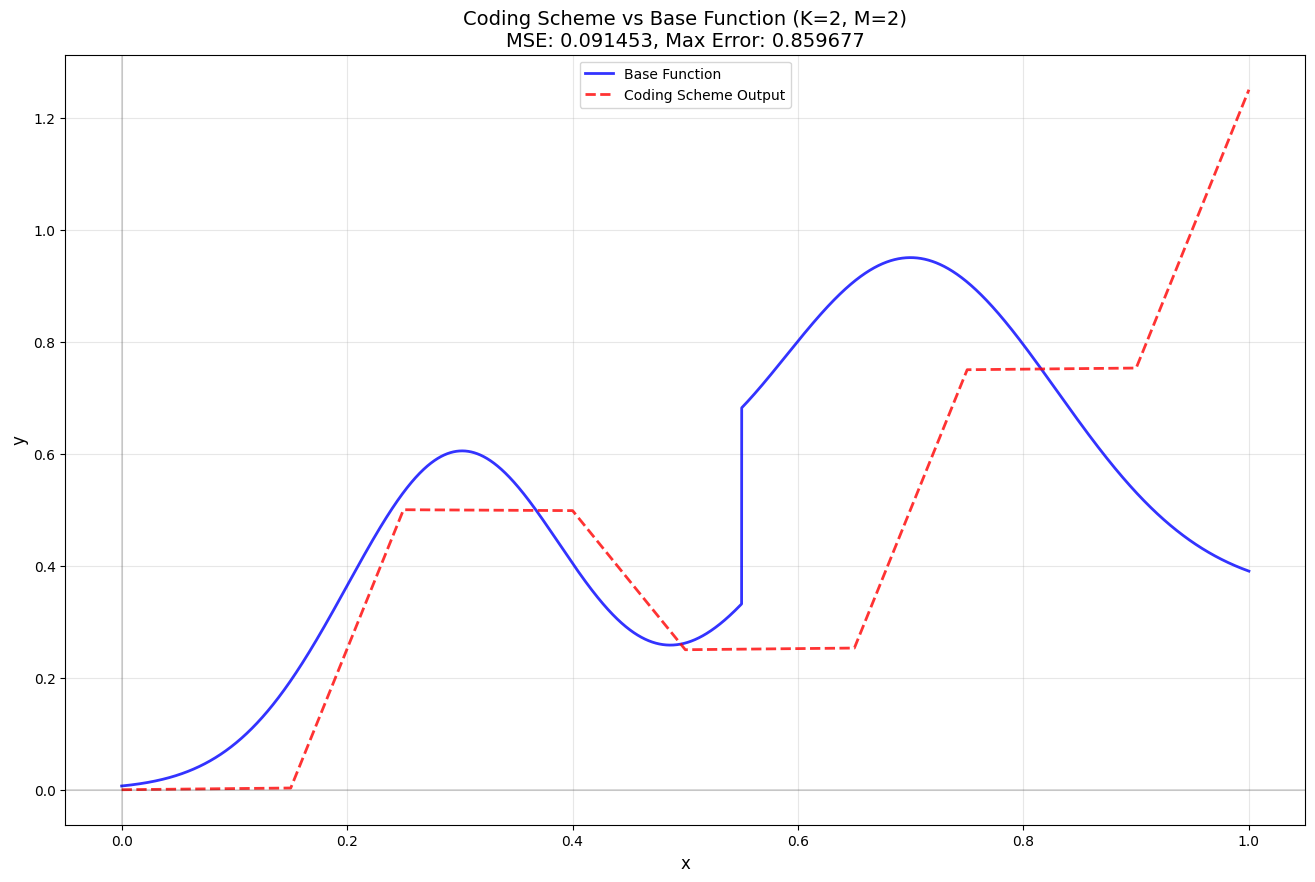

self.plcsm_increasing_list: [Sigma_ab_cd(a=1.0, b=0.01, c=0.0, d=0.0), Sigma_ab_cd(a=1.0, b=1.0, c=0.0025, d=0.0025), Sigma_ab_cd(a=1.0, b=101.0, c=0.005, d=0.005)]
self.plcsm_decreasing_list: [Sigma_ab_cd(a=1.0, b=0.01, c=0.0, d=0.0), Sigma_ab_cd(a=1.0, b=1.0, c=0.0025, d=0.0025), Sigma_ab_cd(a=1.0, b=1.0, c=0.005, d=0.005), Negate()]


In [ ]:
coding_scheme_squared = CodingScheme1D(squared_shifted, memorizer_type="plcsm", dtype=dtype, device=device)
coding_scheme_gaussian = CodingScheme1D(gaussian_mixture_with_step, K=4, memorizer_type="plcsm", dtype=dtype, device=device)
coding_scheme_gaussian.plot_with_base_function()
coding_scheme_swish = CodingScheme1D(swish_shifted, memorizer_type="plcsm", dtype=dtype, device=device)

self.plcsm_increasing_list: [Sigma_ab_cd(a=1.0, b=2.01, c=0.0, d=0.0), Sigma_ab_cd(a=1.0, b=0.5024875621890548, c=0.5025, d=0.5025), Sigma_ab_cd(a=1.0, b=0.009900990099009901, c=0.7549999999999999, d=0.7549999999999999)]
self.plcsm_decreasing_list: [Sigma_ab_cd(a=1.0, b=0.01, c=0.0, d=0.0), Sigma_ab_cd(a=1.0, b=1.0, c=0.0025, d=0.0025), Sigma_ab_cd(a=1.0, b=101.0, c=0.005, d=0.005), Negate()]


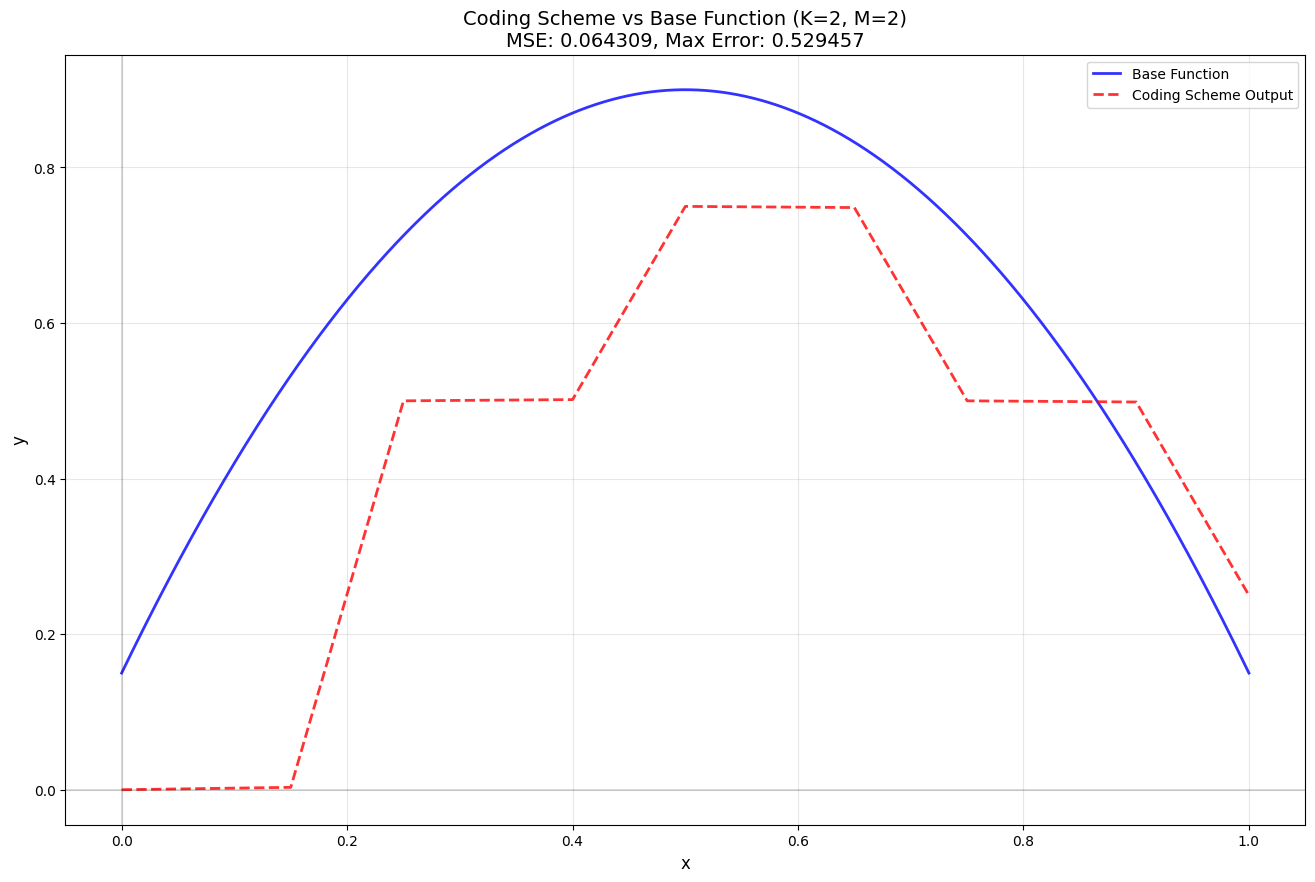

For Squared Shifted Function with parameters K=2, M=2, gamma=0.1, flat_slope=0.01:
 - L2 error: 0.253592, Max error: 0.529457
self.plcsm_increasing_list: [Sigma_ab_cd(a=1.0, b=2.001, c=0.0, d=0.125), Sigma_ab_cd(a=1.0, b=1.0, c=0.375125, d=0.375125), Sigma_ab_cd(a=1.0, b=0.5002498750624688, c=0.62525, d=0.62525), Sigma_ab_cd(a=1.0, b=1.0, c=0.750375, d=0.750375), Sigma_ab_cd(a=1.0, b=0.0009990009990009992, c=0.8755, d=0.8755), Sigma_ab_cd(a=1.0, b=1.0, c=0.875625, d=0.875625), Sigma_ab_cd(a=1.0, b=1.0, c=0.87575, d=0.87575)]
self.plcsm_decreasing_list: [Sigma_ab_cd(a=1.0, b=0.001, c=0.0, d=0.0), Sigma_ab_cd(a=1.0, b=1.0, c=0.000125, d=0.000125), Sigma_ab_cd(a=1.0, b=1.0, c=0.00025, d=0.00025), Sigma_ab_cd(a=1.0, b=1.0, c=0.000375, d=0.000375), Sigma_ab_cd(a=1.0, b=1000.9999999999999, c=0.0005, d=0.0005), Sigma_ab_cd(a=1.0, b=1.0, c=0.125625, d=0.125625), Sigma_ab_cd(a=1.0, b=1.9990009990009991, c=0.25075, d=0.25075), Negate()]


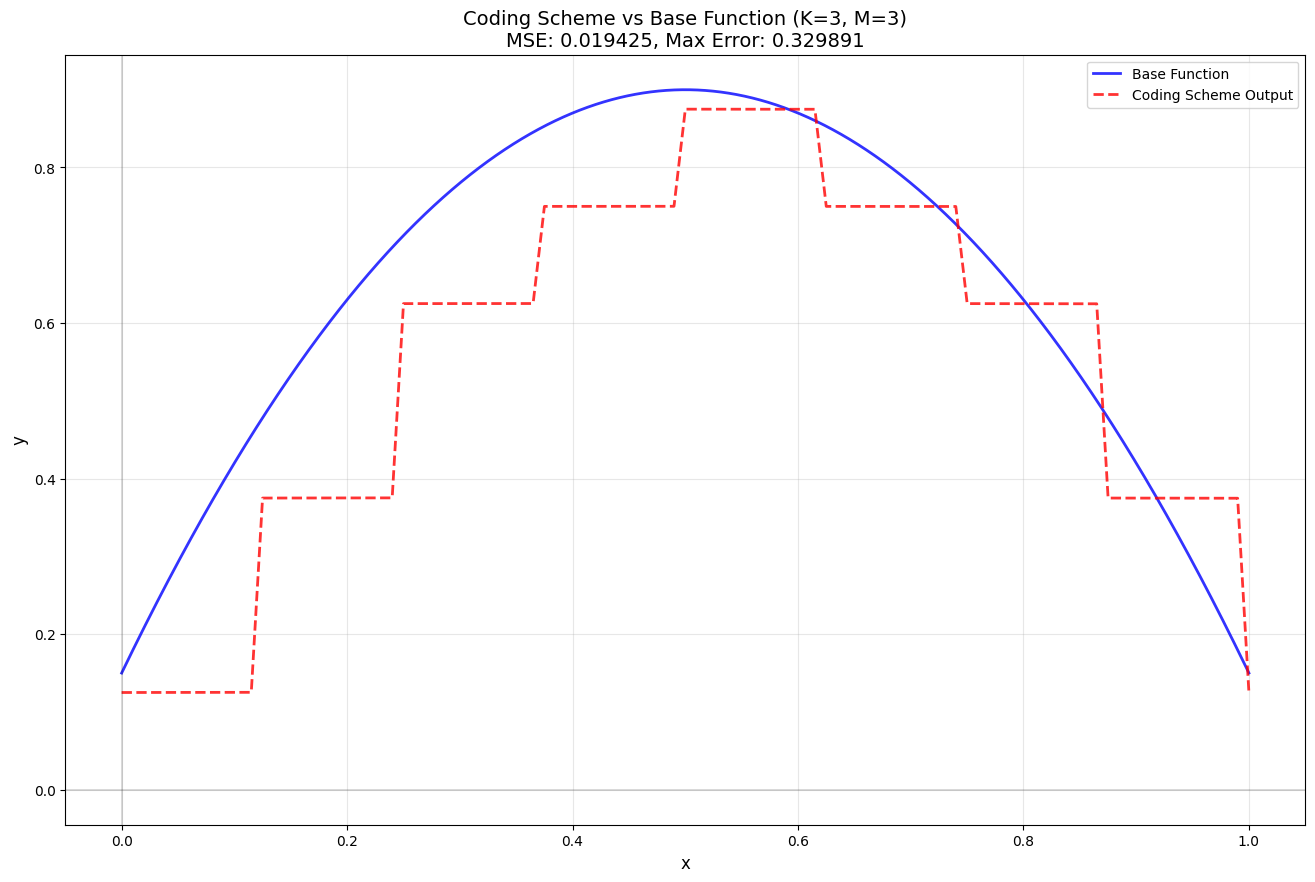

For Squared Shifted Function with parameters K=3, M=3, gamma=0.01, flat_slope=0.001:
 - L2 error: 0.139375, Max error: 0.329891
self.plcsm_increasing_list: [Sigma_ab_cd(a=1.0, b=3.0001, c=0.0, d=0.125), Sigma_ab_cd(a=1.0, b=0.6666777774074197, c=0.31250625, d=0.31250625), Sigma_ab_cd(a=1.0, b=1.0, c=0.43751249999999997, d=0.43751249999999997), Sigma_ab_cd(a=1.0, b=1.0, c=0.56251875, d=0.56251875), Sigma_ab_cd(a=1.0, b=0.5000249987500625, c=0.6875249999999999, d=0.6875249999999999), Sigma_ab_cd(a=1.0, b=1.0, c=0.7500312499999999, d=0.7500312499999999), Sigma_ab_cd(a=1.0, b=1.0, c=0.8125374999999999, d=0.8125374999999999), Sigma_ab_cd(a=1.0, b=9.999000099990002e-05, c=0.8750437499999999, d=0.8750437499999999), Sigma_ab_cd(a=1.0, b=1.0, c=0.8750499999999999, d=0.8750499999999999), Sigma_ab_cd(a=1.0, b=1.0, c=0.8750562499999999, d=0.8750562499999999), Sigma_ab_cd(a=1.0, b=1.0, c=0.8750624999999999, d=0.8750624999999999), Sigma_ab_cd(a=1.0, b=1.0, c=0.8750687499999998, d=0.8750687499999998)

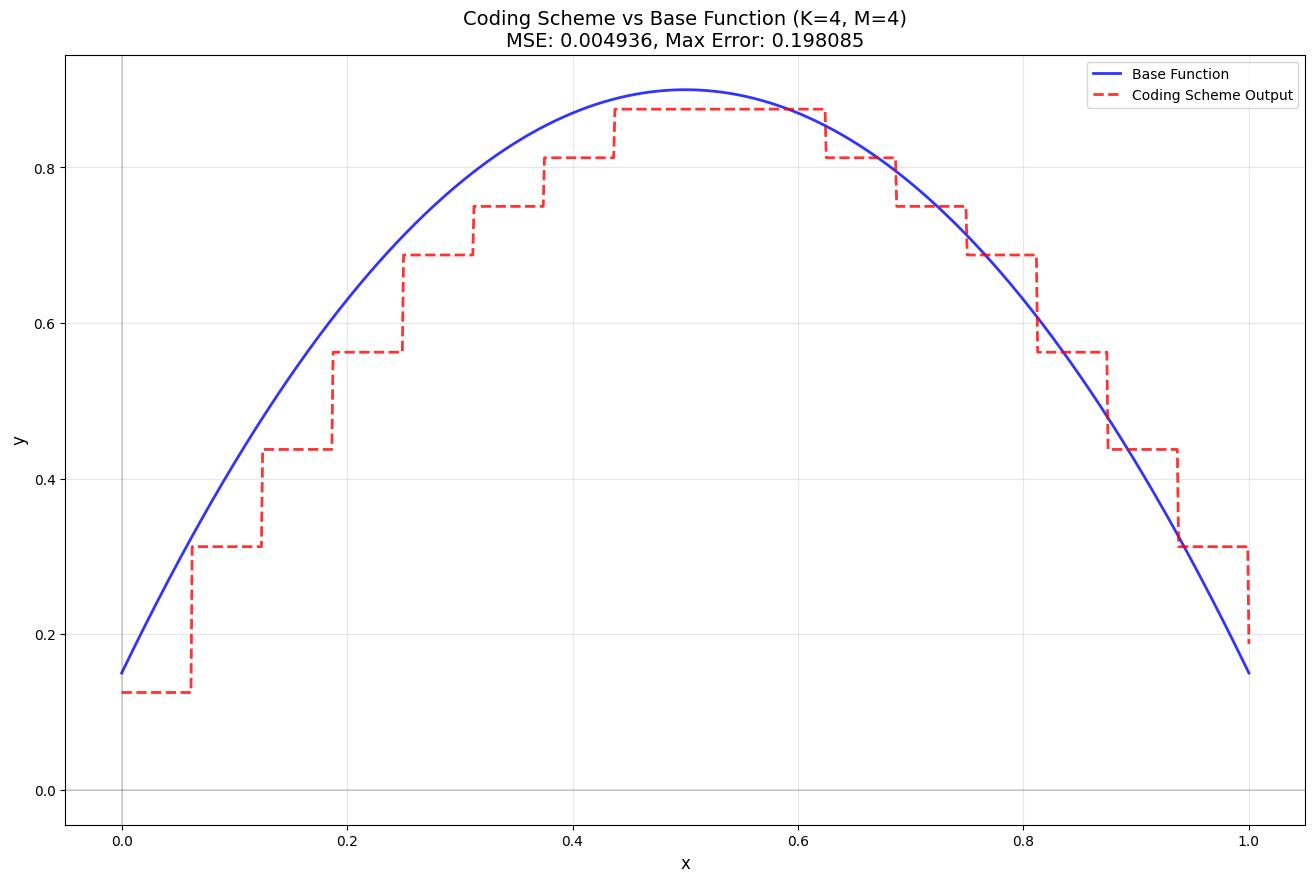

For Squared Shifted Function with parameters K=4, M=4, gamma=0.001, flat_slope=0.0001:
 - L2 error: 0.070258, Max error: 0.197888
self.plcsm_increasing_list: [Sigma_ab_cd(a=1.0, b=3.00001, c=0.0, d=0.125), Sigma_ab_cd(a=1.0, b=1.0, c=0.2187503125, d=0.2187503125), Sigma_ab_cd(a=1.0, b=0.666667777774074, c=0.312500625, d=0.312500625), Sigma_ab_cd(a=1.0, b=1.4999975000124999, c=0.37500093749999996, d=0.37500093749999996), Sigma_ab_cd(a=1.0, b=0.666667777774074, c=0.46875124999999995, d=0.46875124999999995), Sigma_ab_cd(a=1.0, b=1.0, c=0.5312515624999999, d=0.5312515624999999), Sigma_ab_cd(a=1.0, b=1.0, c=0.5937518749999999, d=0.5937518749999999), Sigma_ab_cd(a=1.0, b=0.5000024999875001, c=0.6562521874999999, d=0.6562521874999999), Sigma_ab_cd(a=1.0, b=1.9999900000999988, c=0.6875024999999999, d=0.6875024999999999), Sigma_ab_cd(a=1.0, b=0.5000024999875001, c=0.7500028124999999, d=0.7500028124999999), Sigma_ab_cd(a=1.0, b=1.0, c=0.7812531249999999, d=0.7812531249999999), Sigma_ab_cd(a=1.0,

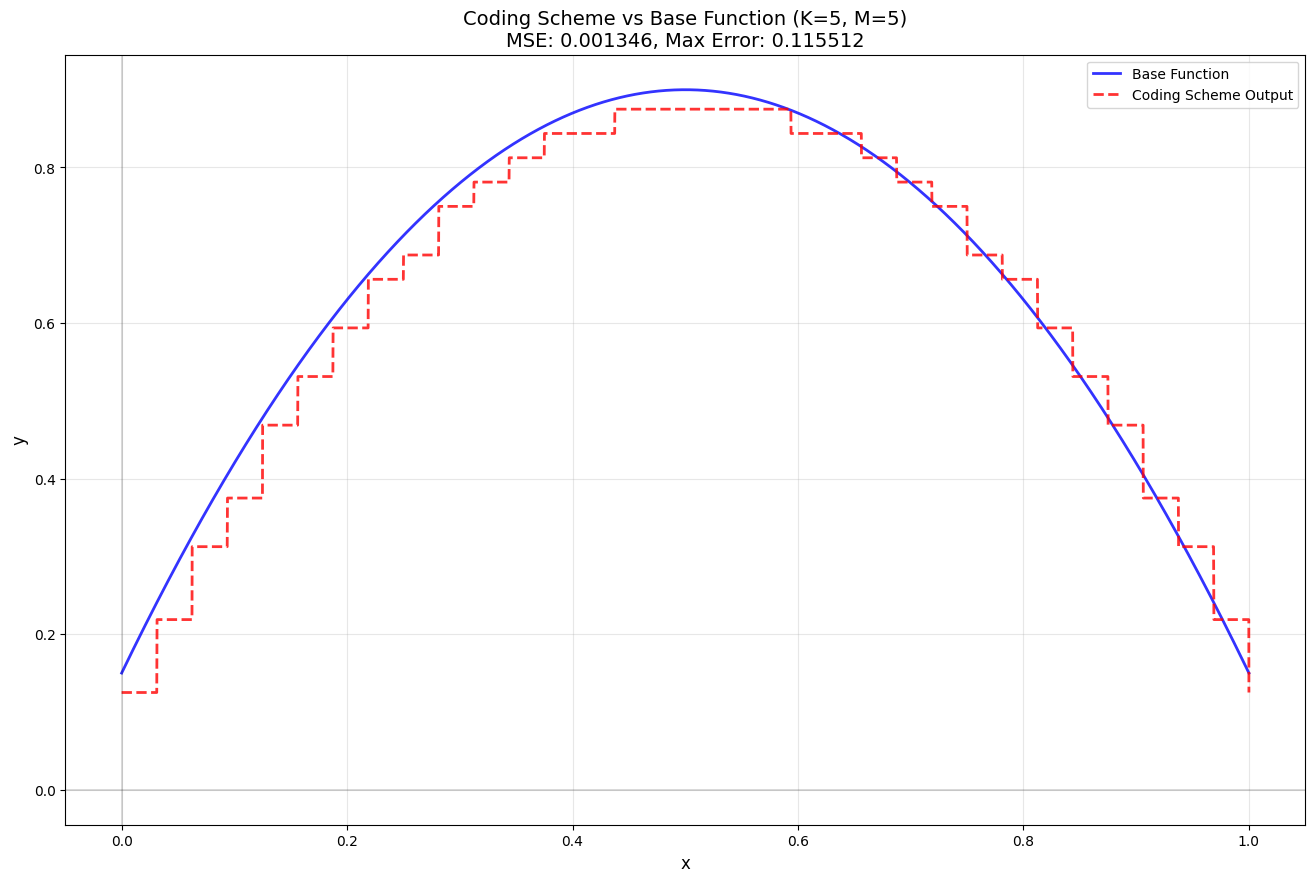

For Squared Shifted Function with parameters K=5, M=5, gamma=0.0001, flat_slope=1e-05:
 - L2 error: 0.036693, Max error: 0.115406
self.plcsm_increasing_list: [Sigma_ab_cd(a=1.0, b=3.000001, c=0.0, d=0.140625), Sigma_ab_cd(a=1.0, b=1.0, c=0.18750001562500002, d=0.18750001562500002), Sigma_ab_cd(a=1.0, b=1.0, c=0.23437503125000003, d=0.23437503125000003), Sigma_ab_cd(a=1.0, b=0.6666667777777407, c=0.28125004687500005, d=0.28125004687500005), Sigma_ab_cd(a=1.0, b=1.499999750000125, c=0.31250006250000006, d=0.31250006250000006), Sigma_ab_cd(a=1.0, b=0.6666667777777407, c=0.3593750781250001, d=0.3593750781250001), Sigma_ab_cd(a=1.0, b=1.499999750000125, c=0.3906250937500001, d=0.3906250937500001), Sigma_ab_cd(a=1.0, b=0.6666667777777407, c=0.4375001093750001, d=0.4375001093750001), Sigma_ab_cd(a=1.0, b=1.0, c=0.46875012500000013, d=0.46875012500000013), Sigma_ab_cd(a=1.0, b=1.0, c=0.5000001406250001, d=0.5000001406250001), Sigma_ab_cd(a=1.0, b=1.0, c=0.53125015625, d=0.53125015625), Sigma_a

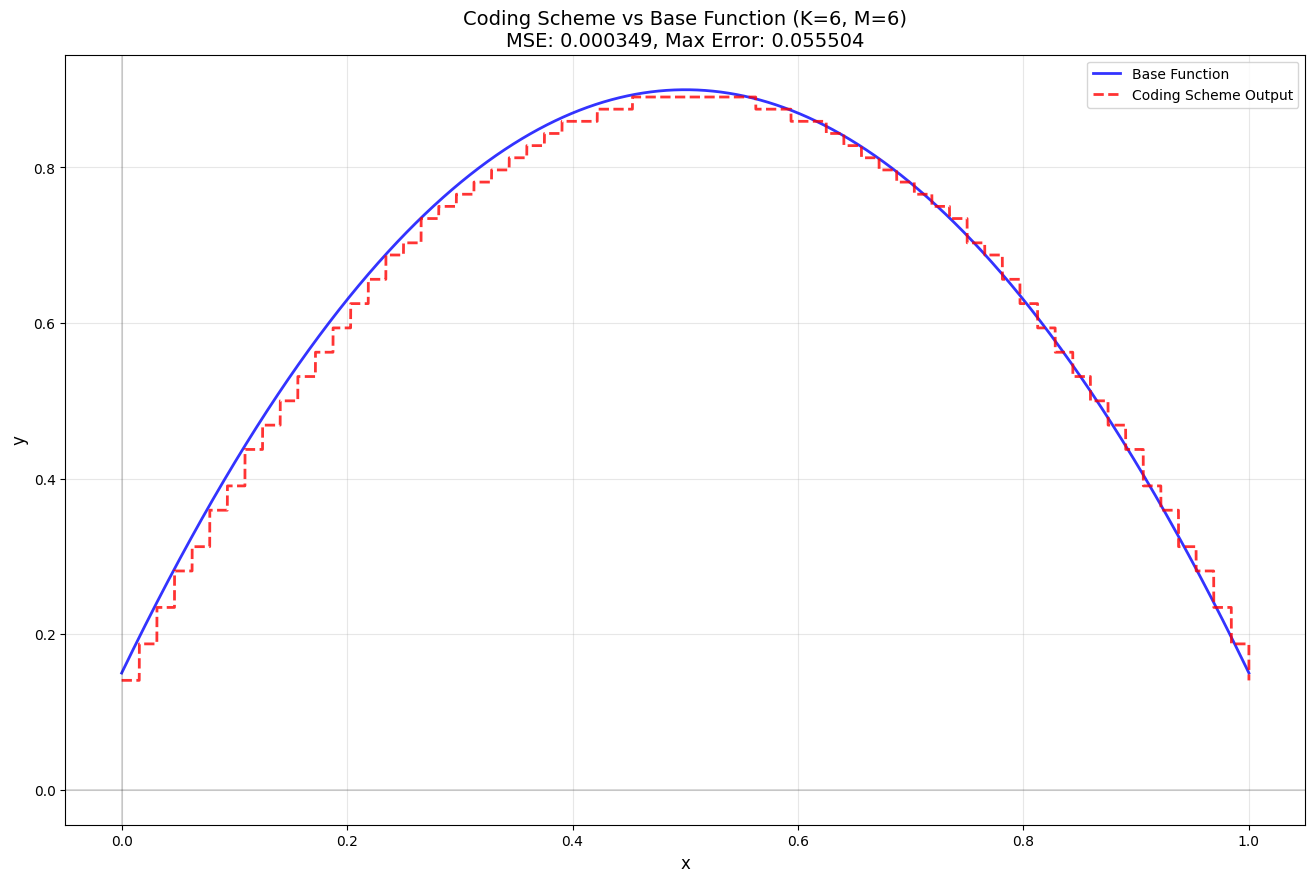

For Squared Shifted Function with parameters K=6, M=6, gamma=1e-06, flat_slope=1e-06:
 - L2 error: 0.018693, Max error: 0.055449


[(2, 2, 0.1, 0.01, 0.2535923078345303, 0.5294569450194342),
 (3, 3, 0.01, 0.001, 0.13937477442738552, 0.32989069807070737),
 (4, 4, 0.001, 0.0001, 0.07025783394773866, 0.19788785768465722),
 (5, 5, 0.0001, 1e-05, 0.036692660459950475, 0.11540618742672692),
 (6, 6, 1e-06, 1e-06, 0.018692755275278215, 0.05544940762545836)]

In [20]:
# we start a large evaluation for all of them and print out the errors:
input_params = [(2,2,0.1,1e-2), (3,3,0.01,1e-3), (4,4,0.001,1e-4), (5,5,0.0001,1e-5), (6,6,1e-6,1e-6)]#, (7,7,1e-6,1e-6)]#, (8,8,1e-6,1e-6), (10,10,1e-6,1e-6), (11,11,1e-6,1e-6), (7,7,0.1e-7,1e-7)]
coding_scheme_squared.evaluate_for_list_of_parameters(input_params, "Squared Shifted Function", plot=True)

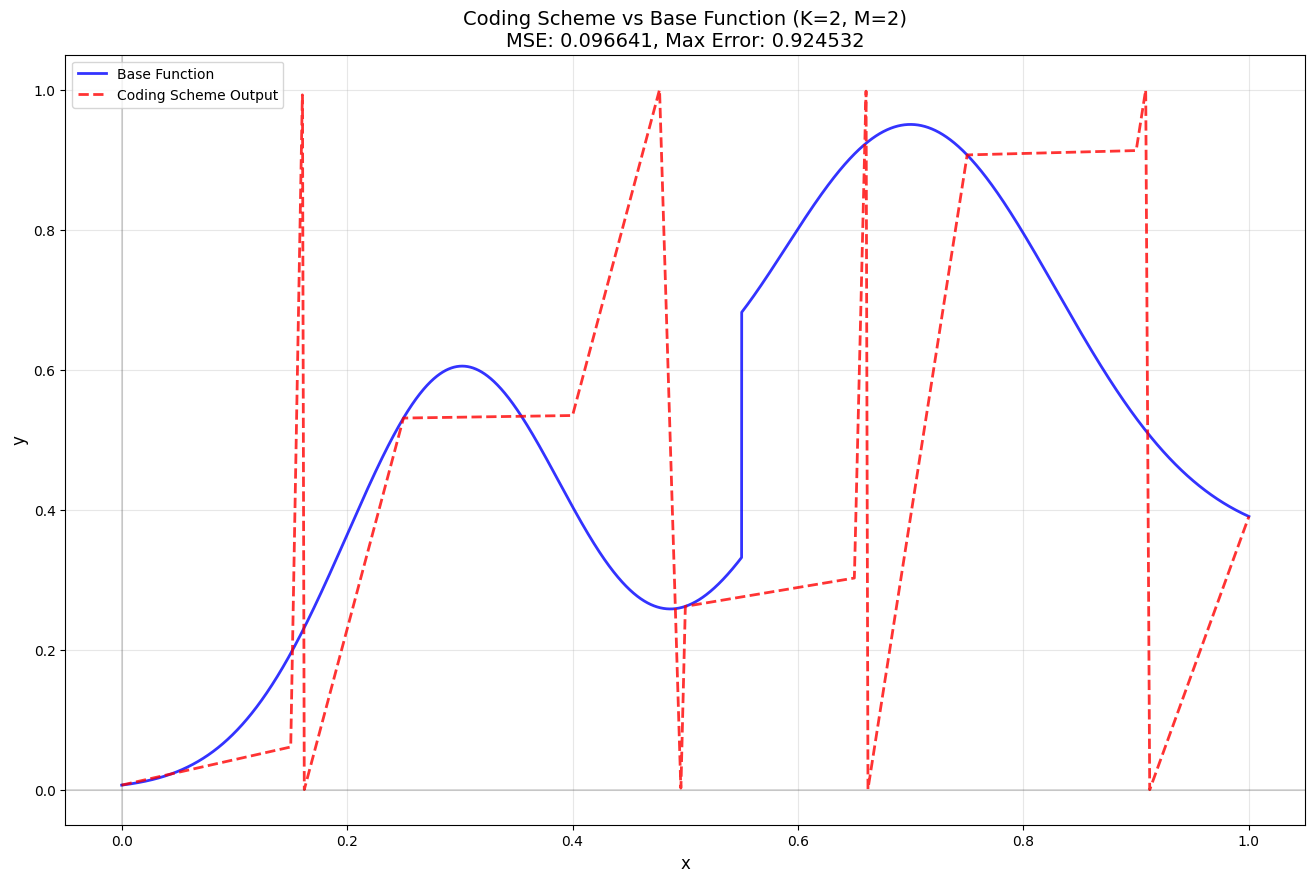

For Gaussian Mixture with Step Function with parameters K=2, M=2, gamma=0.1, flat_slope=0.01:
 - L2 error: 0.310871, Max error: 0.924532


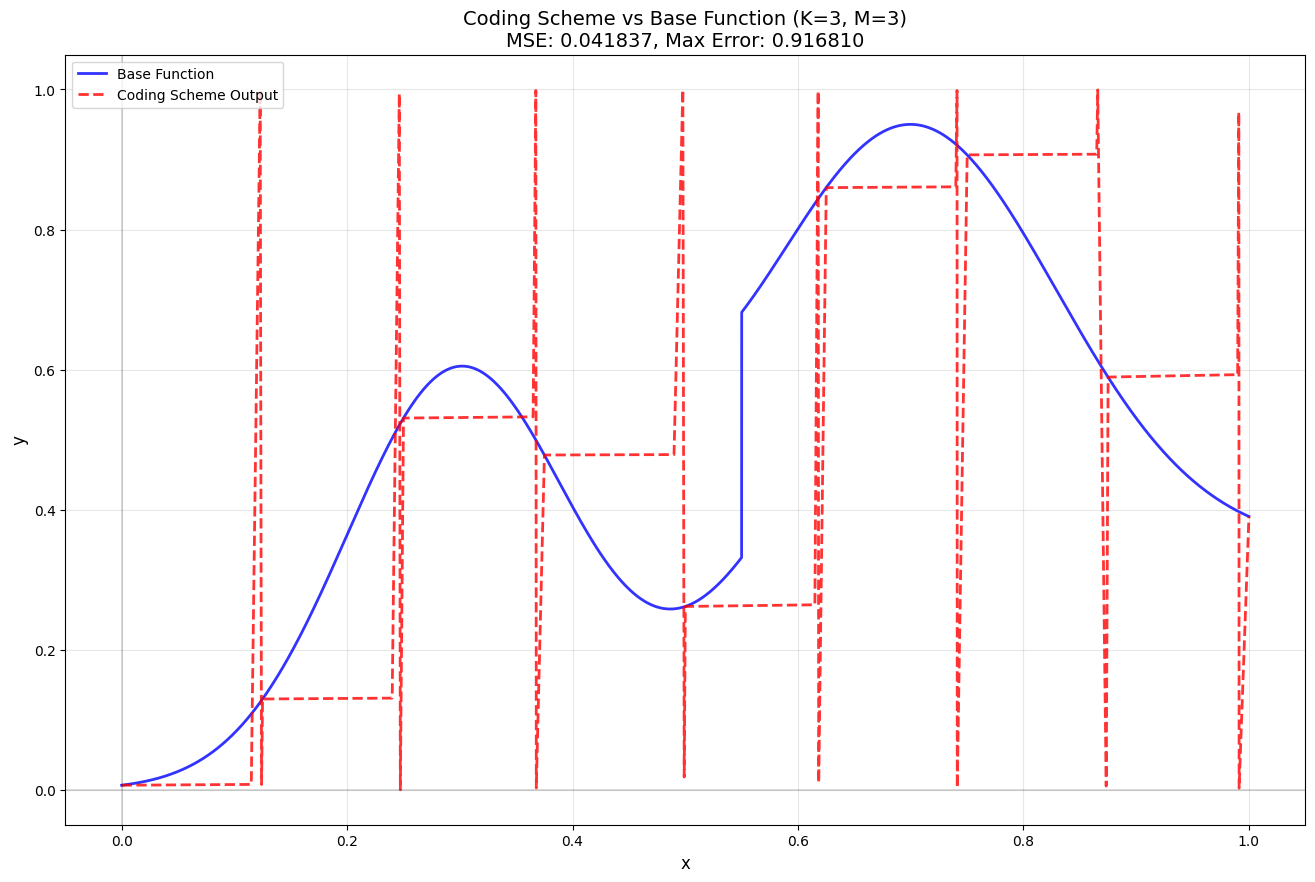

For Gaussian Mixture with Step Function with parameters K=3, M=3, gamma=0.01, flat_slope=0.001:
 - L2 error: 0.204542, Max error: 0.916810


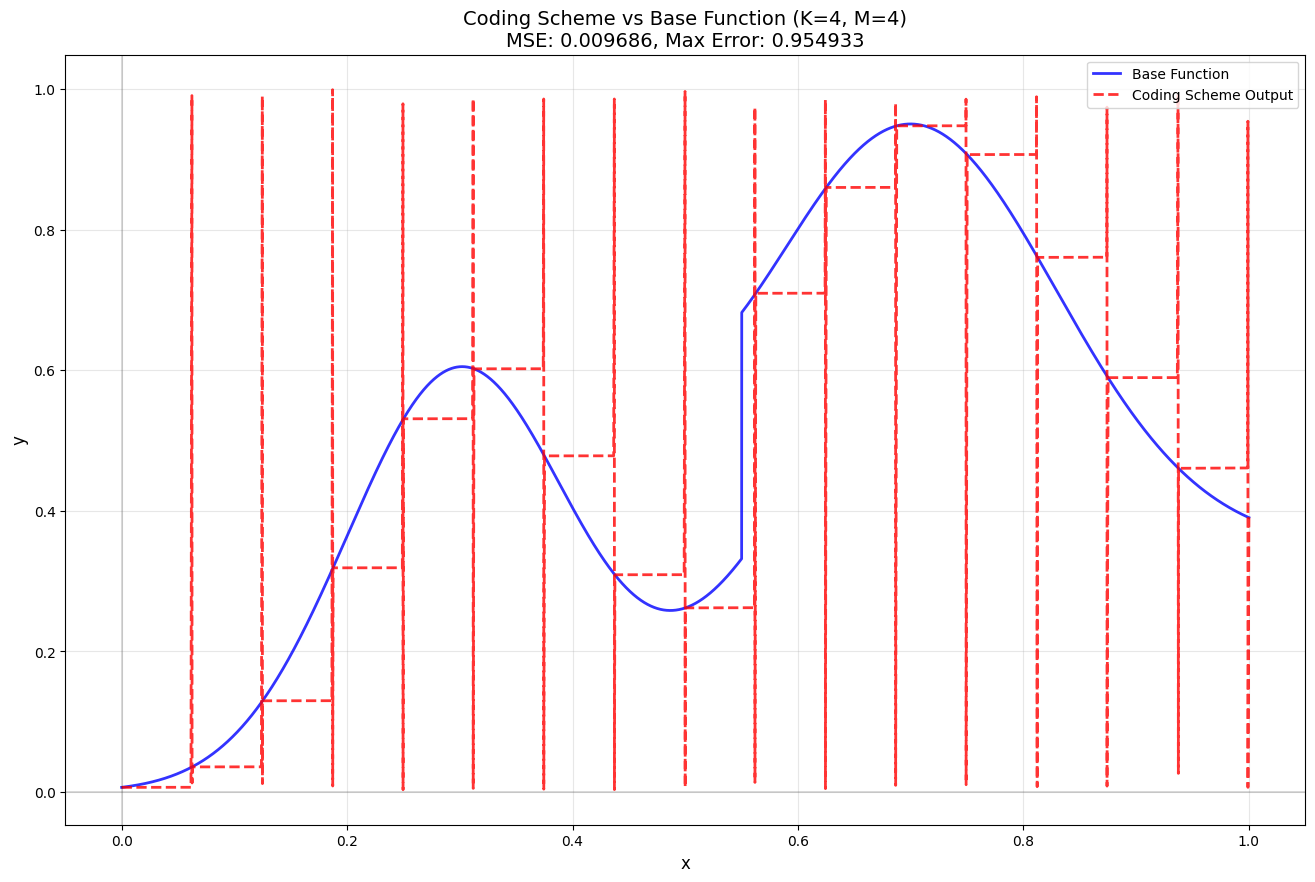

For Gaussian Mixture with Step Function with parameters K=4, M=4, gamma=0.001, flat_slope=0.0001:
 - L2 error: 0.098259, Max error: 0.914014


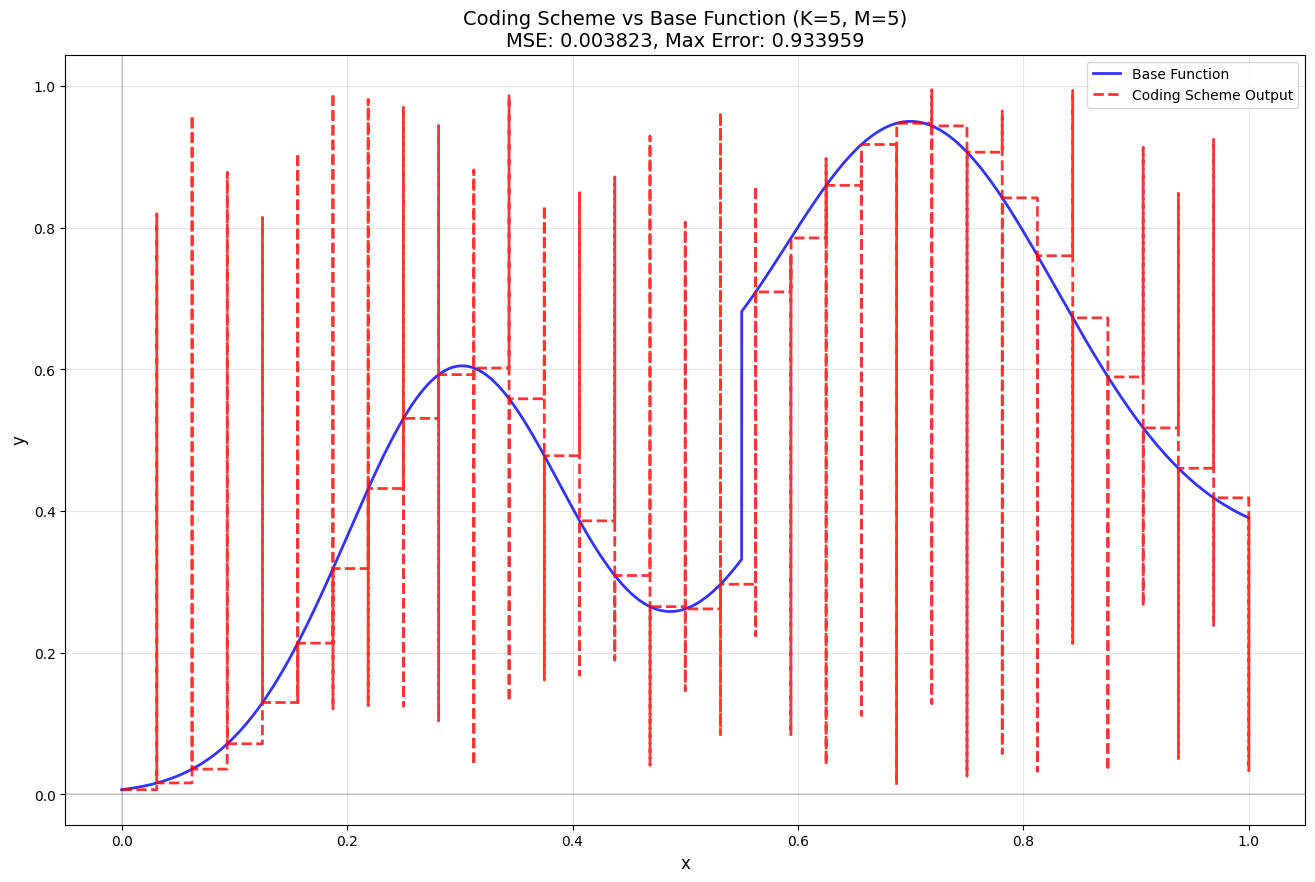

For Gaussian Mixture with Step Function with parameters K=5, M=5, gamma=0.0001, flat_slope=1e-05:
 - L2 error: 0.061741, Max error: 0.884757


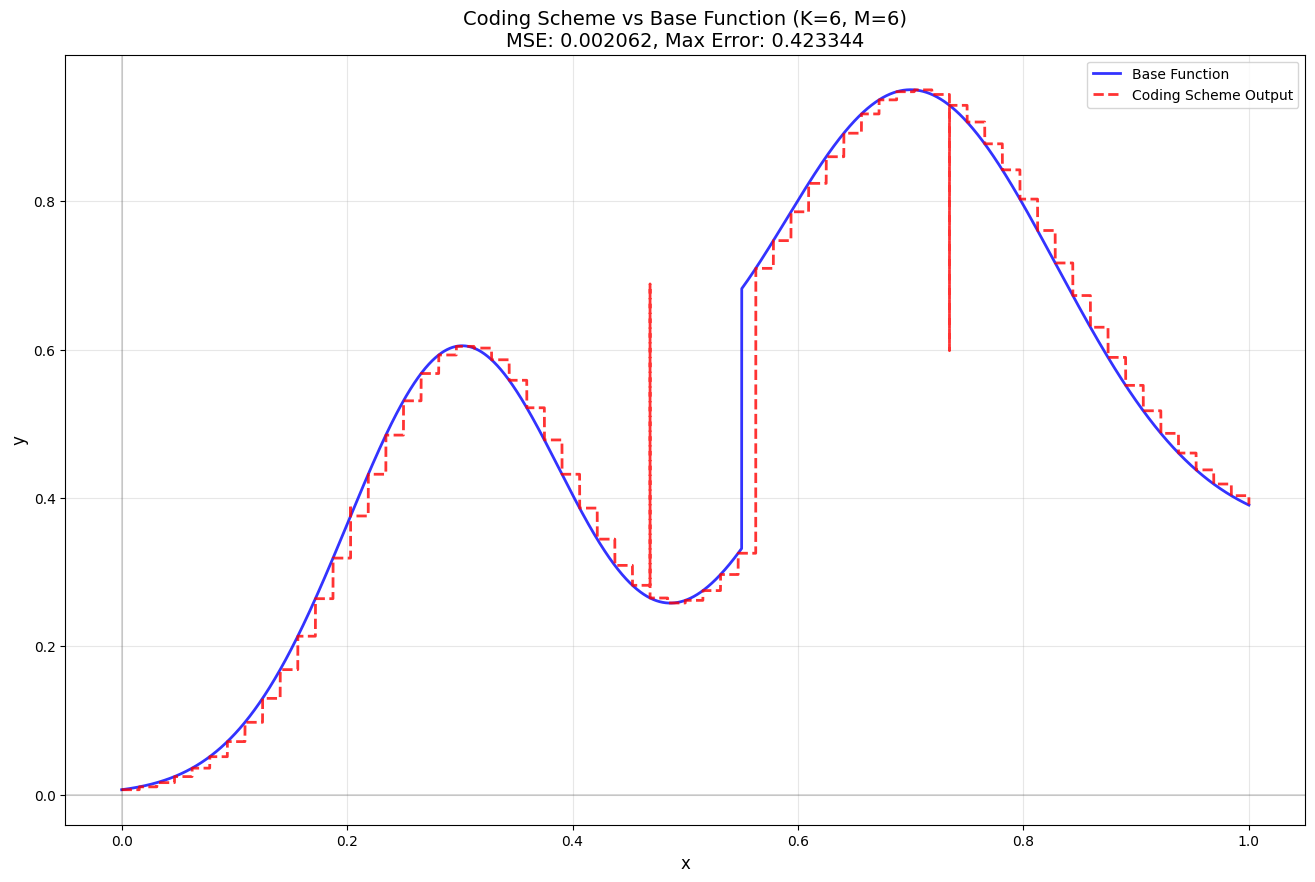

For Gaussian Mixture with Step Function with parameters K=6, M=6, gamma=1e-06, flat_slope=1e-06:
 - L2 error: 0.045347, Max error: 0.383881


[(2, 2, 0.1, 0.01, 0.3108706160364673, 0.9245316927310621),
 (3, 3, 0.01, 0.001, 0.20454178376223467, 0.9168099805789891),
 (4, 4, 0.001, 0.0001, 0.0982587206112663, 0.9140141928286618),
 (5, 5, 0.0001, 1e-05, 0.06174112182175167, 0.8847571688243041),
 (6, 6, 1e-06, 1e-06, 0.045347474564073266, 0.38388101249457807)]

In [11]:
# evaluate for gaussian mixture with step function
coding_scheme_gaussian.evaluate_for_list_of_parameters(input_params, "Gaussian Mixture with Step Function", plot=True)

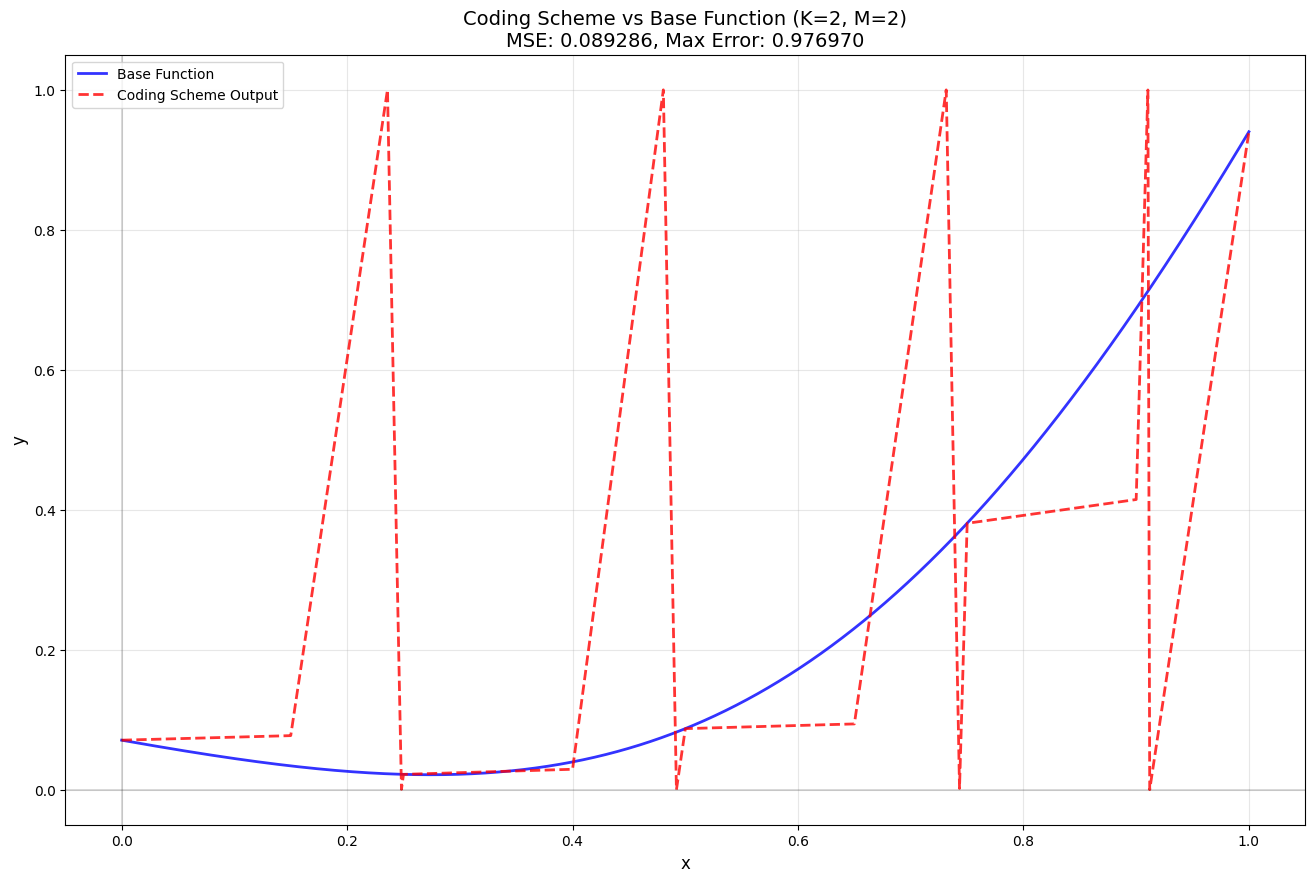

For Swish Shifted Function with parameters K=2, M=2, gamma=0.1, flat_slope=0.01:
 - L2 error: 0.298808, Max error: 0.976970


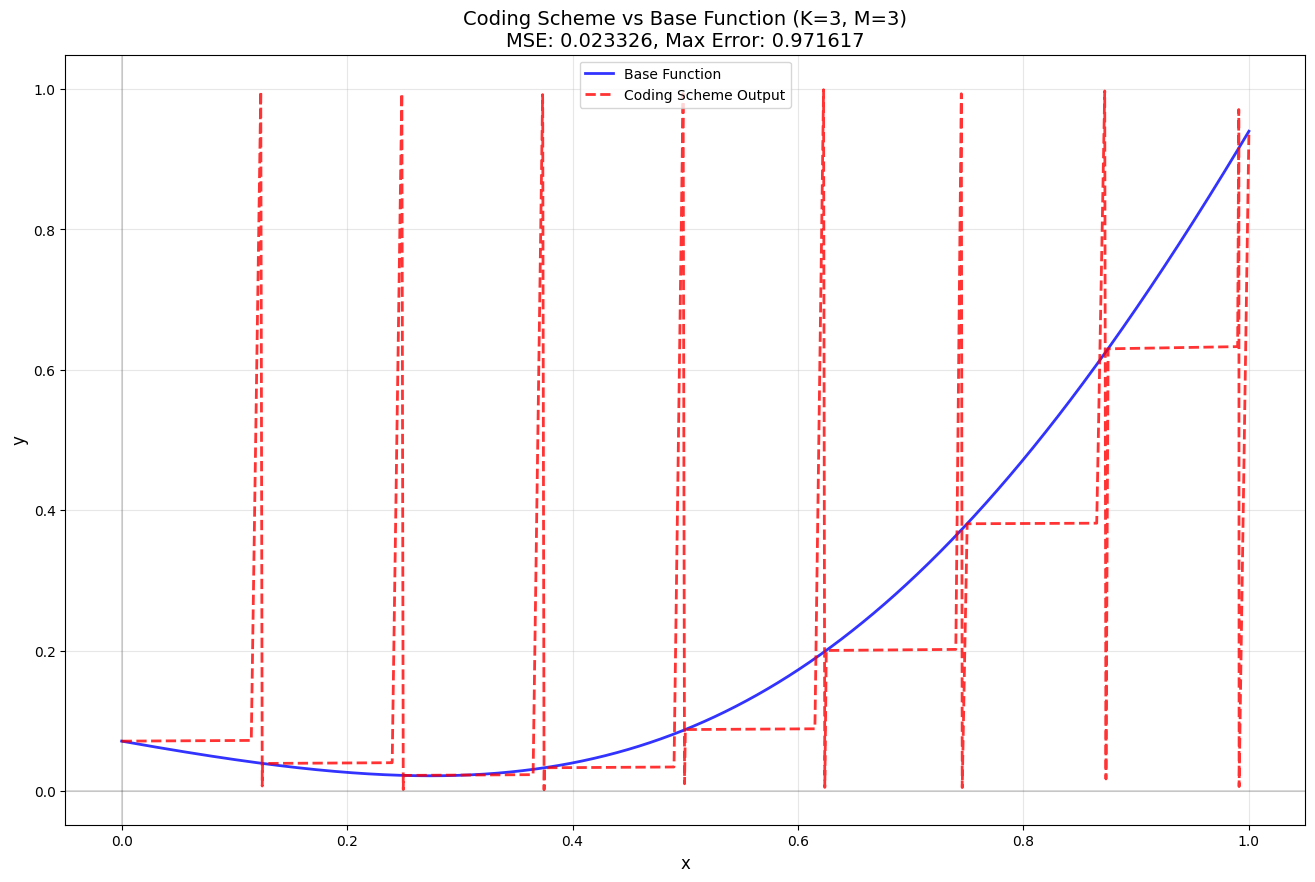

For Swish Shifted Function with parameters K=3, M=3, gamma=0.01, flat_slope=0.001:
 - L2 error: 0.152730, Max error: 0.971617


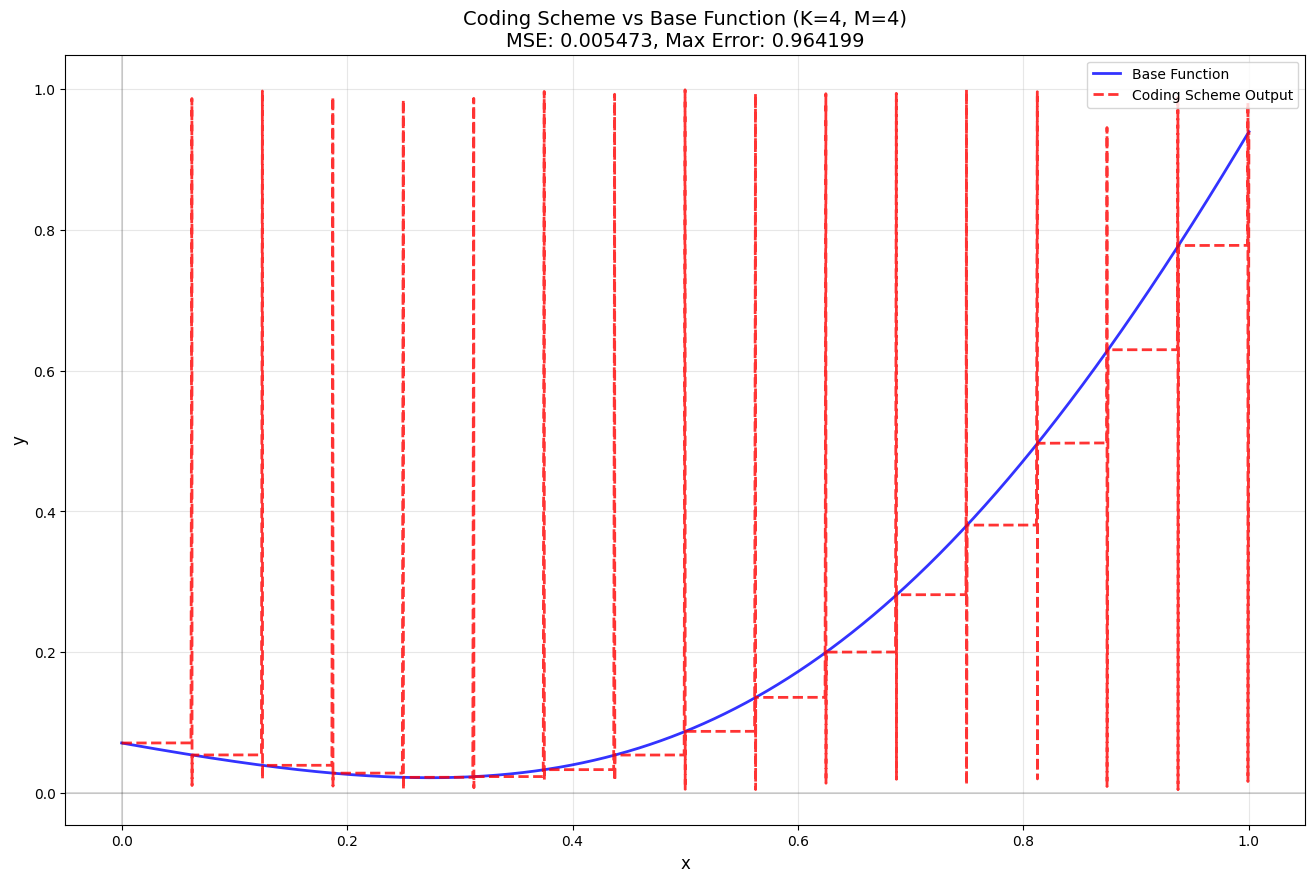

For Swish Shifted Function with parameters K=4, M=4, gamma=0.001, flat_slope=0.0001:
 - L2 error: 0.073629, Max error: 0.952593


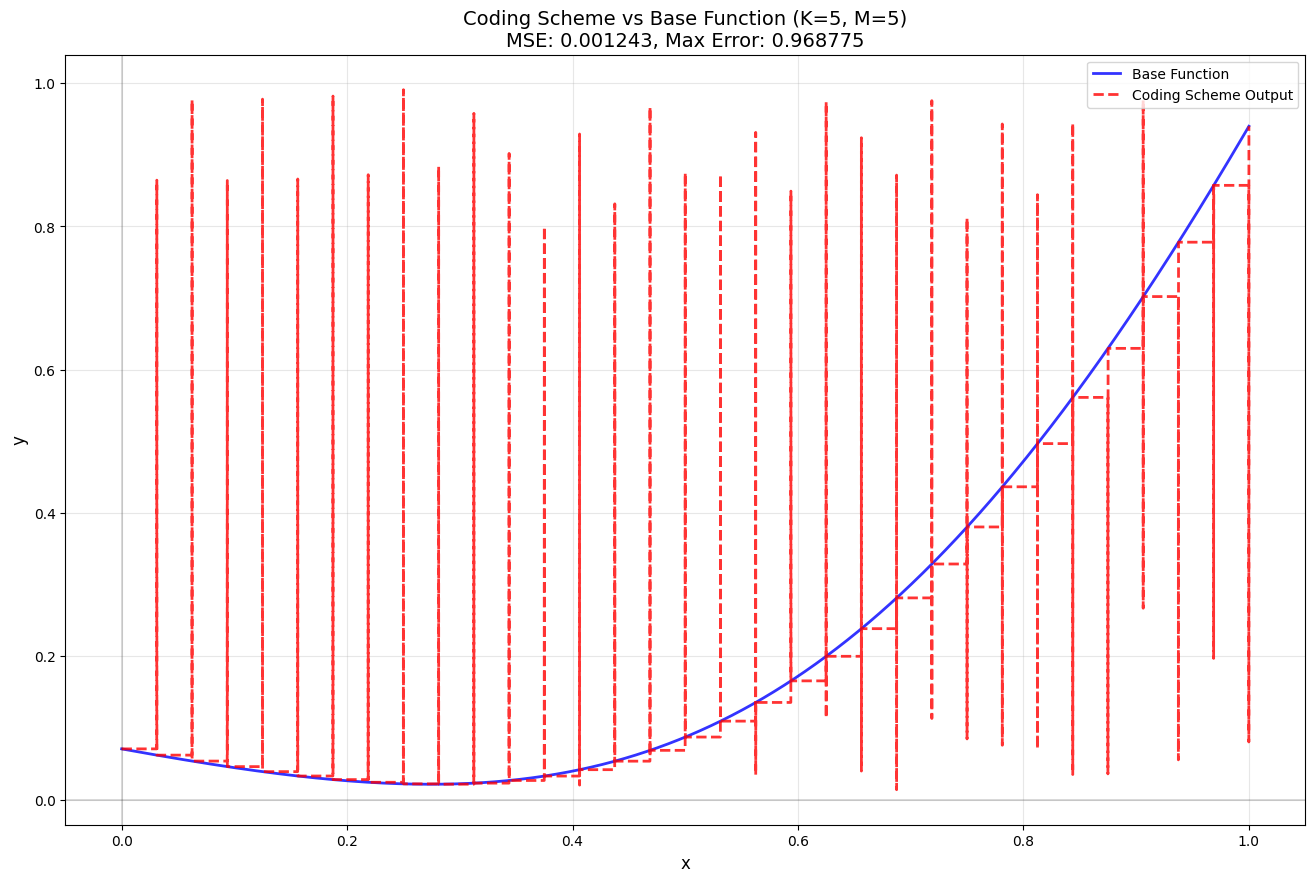

For Swish Shifted Function with parameters K=5, M=5, gamma=0.0001, flat_slope=1e-05:
 - L2 error: 0.034574, Max error: 0.960873


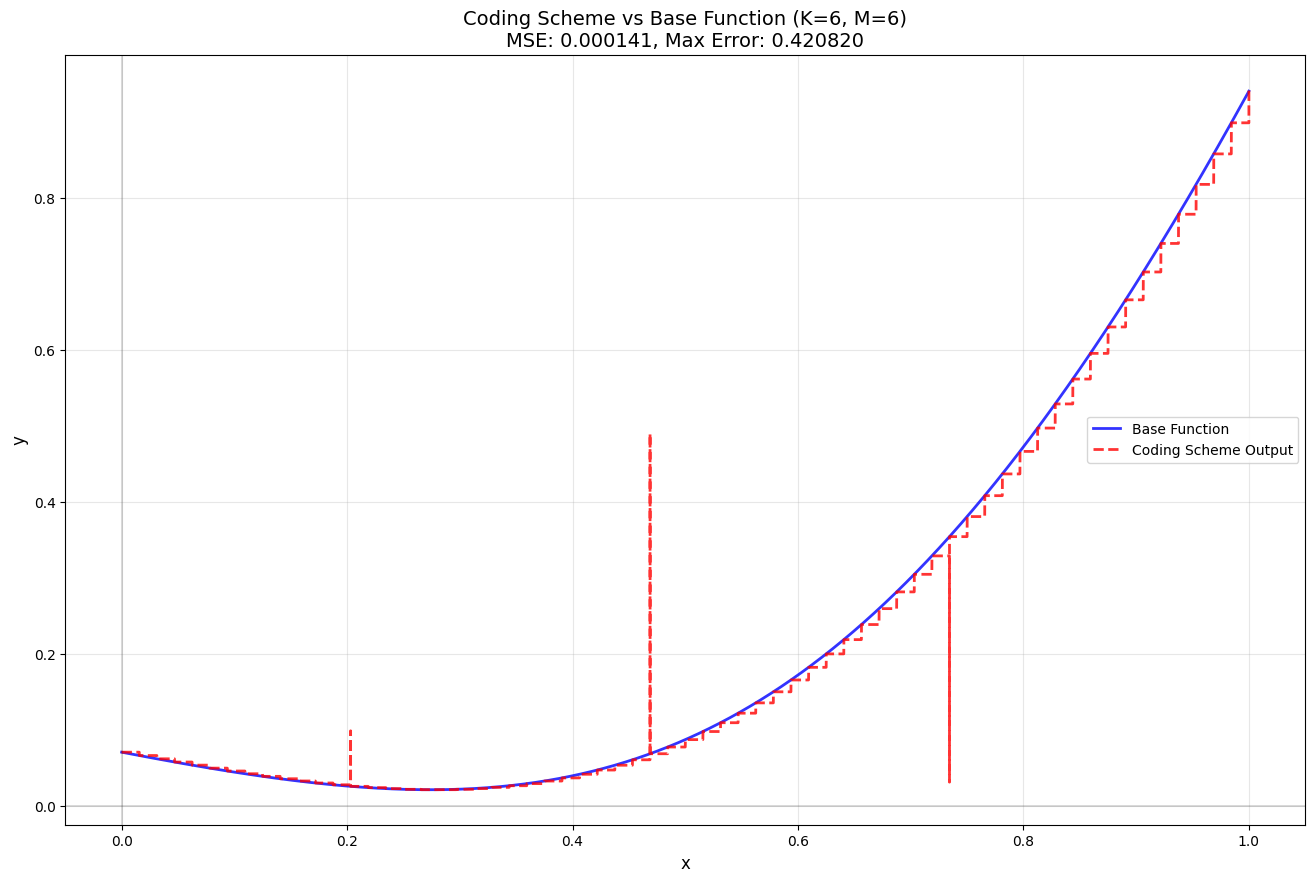

For Swish Shifted Function with parameters K=6, M=6, gamma=1e-06, flat_slope=1e-06:
 - L2 error: 0.011629, Max error: 0.041355


[(2, 2, 0.1, 0.01, 0.29880777232818867, 0.9769704356244708),
 (3, 3, 0.01, 0.001, 0.15273000490208005, 0.9716166160229964),
 (4, 4, 0.001, 0.0001, 0.07362913121753617, 0.9525926342628446),
 (5, 5, 0.0001, 1e-05, 0.034573782239873965, 0.9608730333483564),
 (6, 6, 1e-06, 1e-06, 0.011628649015687999, 0.041354500278291795)]

In [12]:
# evaluate for swish function
coding_scheme_swish.evaluate_for_list_of_parameters(input_params, "Swish Shifted Function", plot=True)

Now, as we've seen the plots of the encoding scheme approximations, we 

Now, as we've seen the purely one dimensional coding scheme with leaky ReLUs that may also use negative slopes, we shift our focus to the coding scheme with invertible leaky ReLUs, which constructs the memorizer in two dimensions, via two monotone piecewise-linear functions. Then, by constructing the two monotone piecewise-linear functions with width two and combining them in one dimension, it can fit the memorizer also arbitrarily well on finite points, but in comparison to the one dimensional approach, the approximation of the encoder 

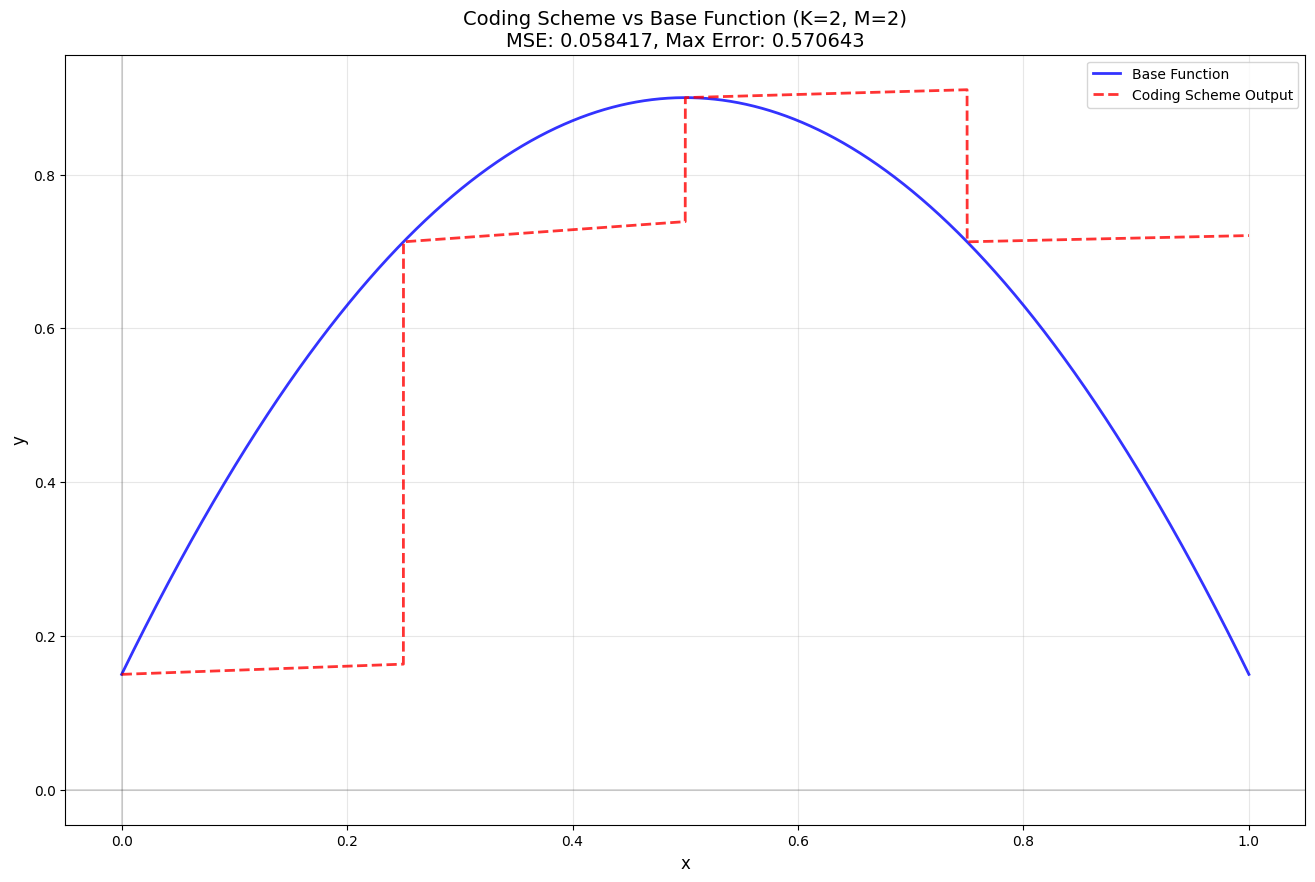

For Squared Shifted Function with Sup Approximation with parameters K=2, M=2, gamma=0.1, flat_slope=0.01:
 - L2 error: 0.241696, Max error: 0.570643


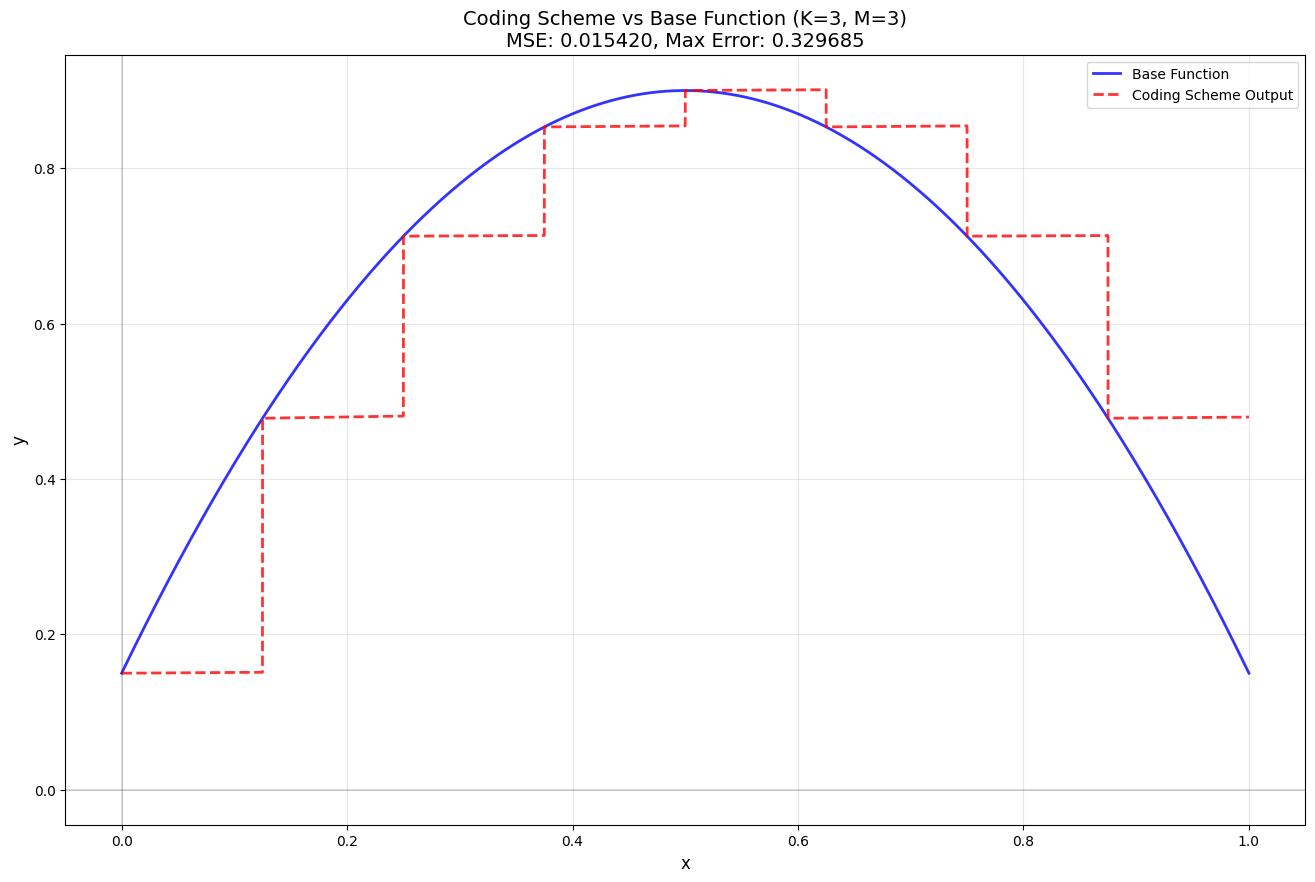

For Squared Shifted Function with Sup Approximation with parameters K=3, M=3, gamma=0.01, flat_slope=0.001:
 - L2 error: 0.124177, Max error: 0.329685


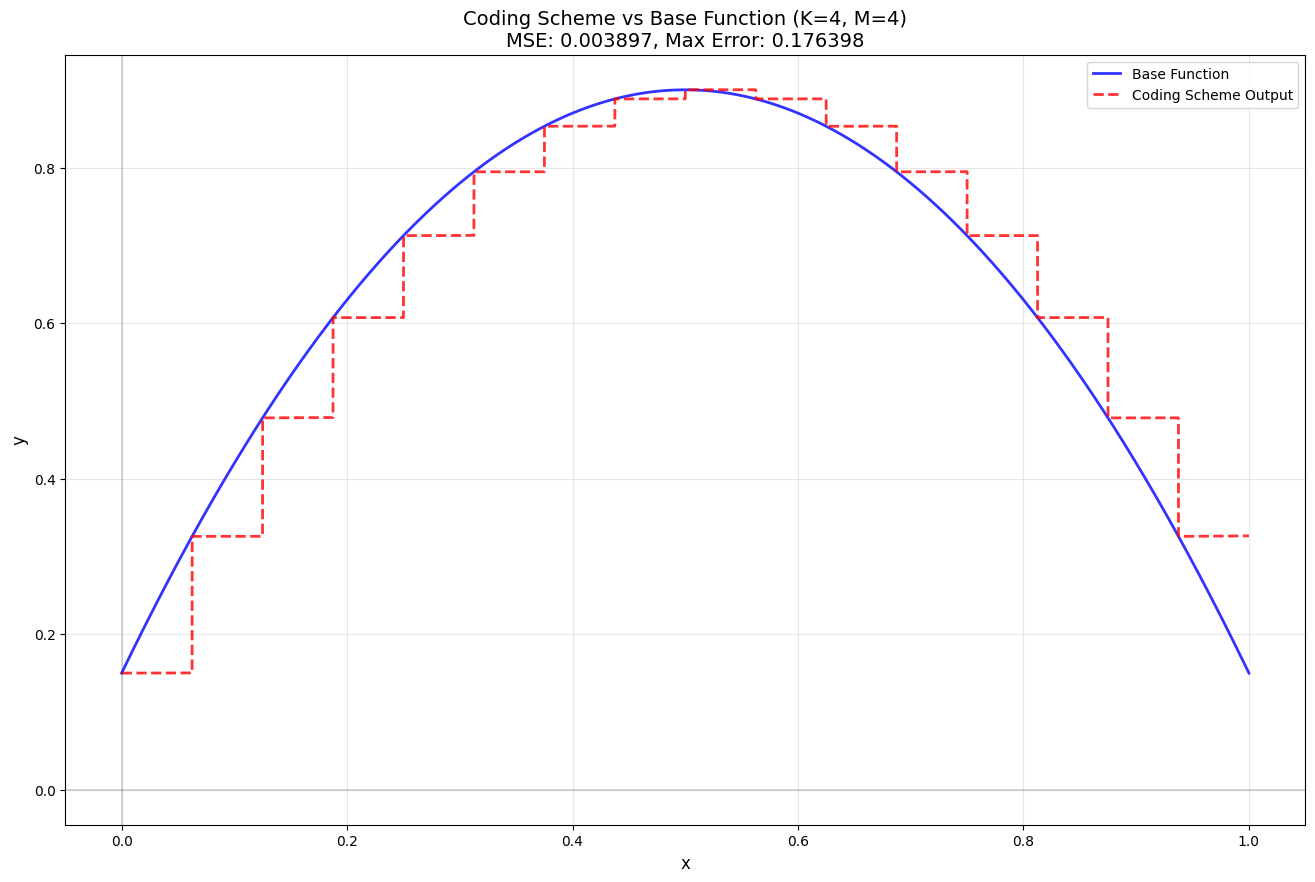

For Squared Shifted Function with Sup Approximation with parameters K=4, M=4, gamma=0.001, flat_slope=0.0001:
 - L2 error: 0.062425, Max error: 0.176398


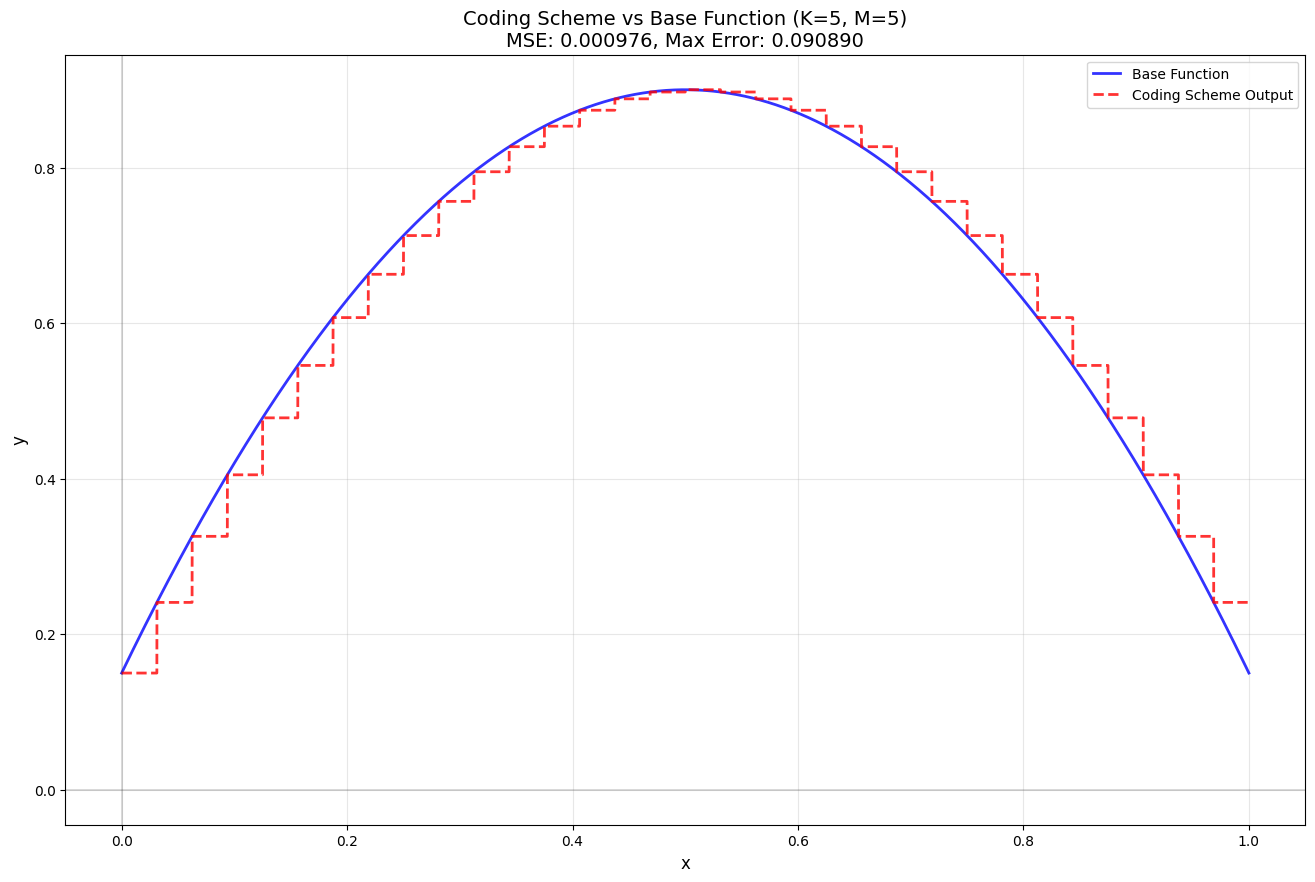

For Squared Shifted Function with Sup Approximation with parameters K=5, M=5, gamma=0.0001, flat_slope=1e-05:
 - L2 error: 0.031244, Max error: 0.090890


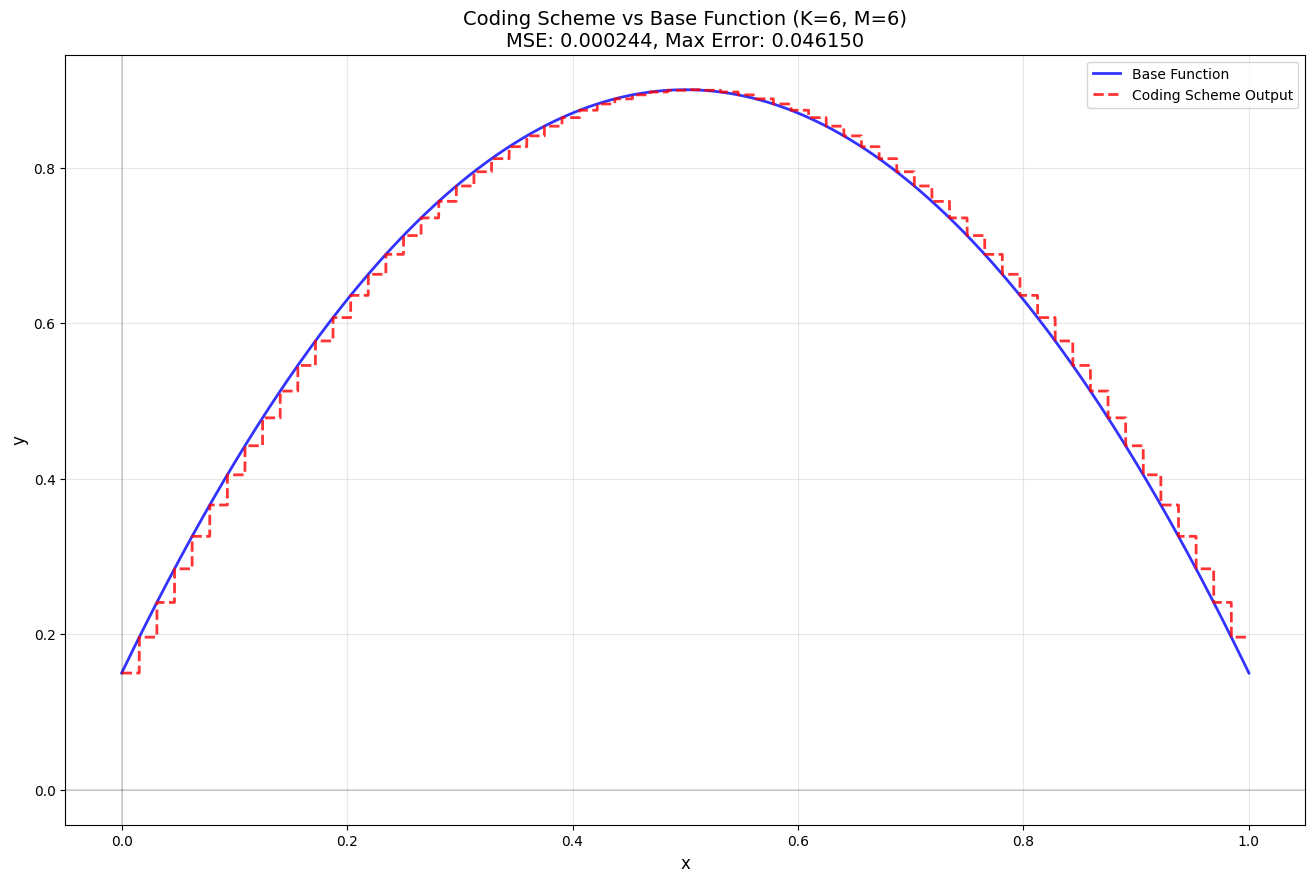

For Squared Shifted Function with Sup Approximation with parameters K=6, M=6, gamma=1e-06, flat_slope=1e-06:
 - L2 error: 0.015626, Max error: 0.046150


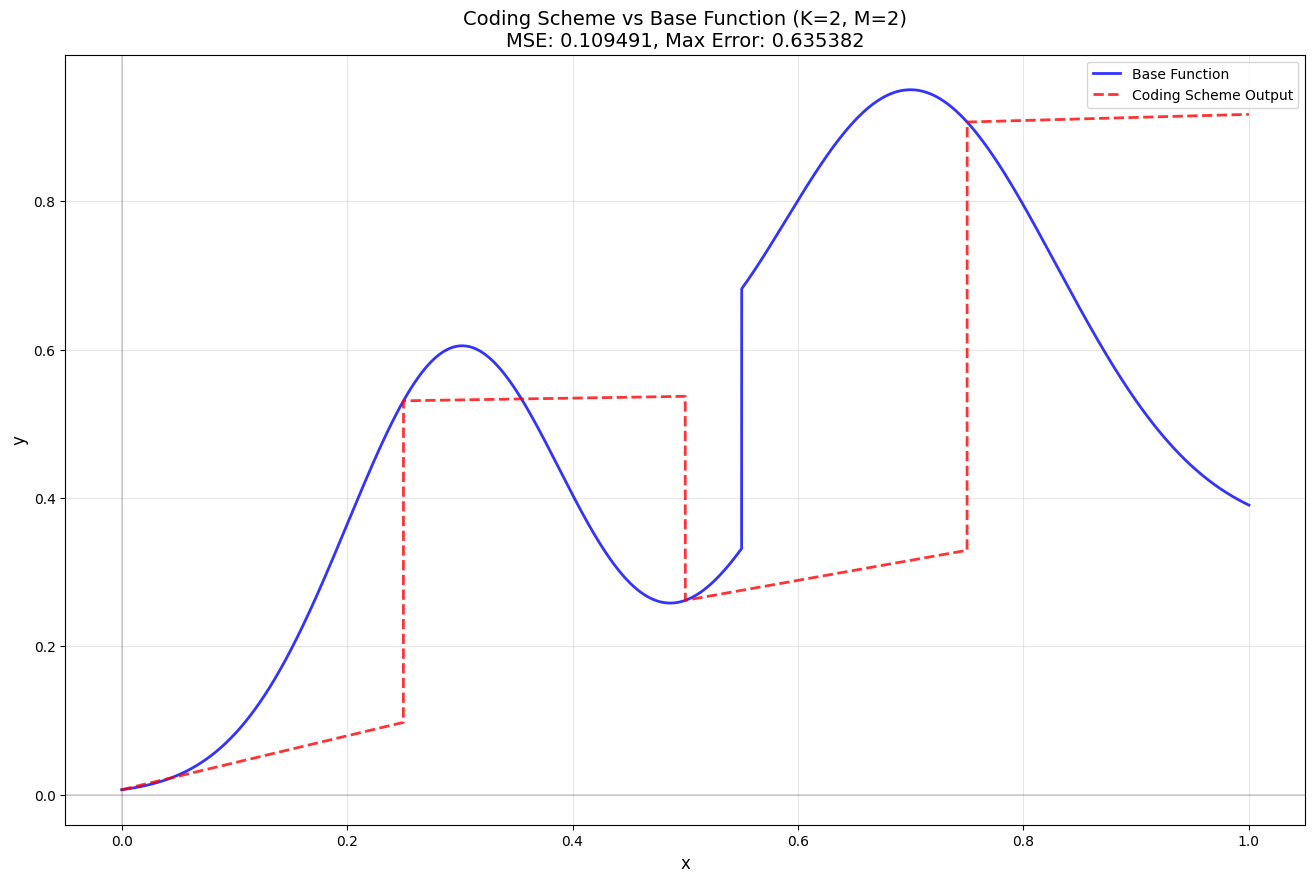

For Gaussian Mixture with Step Function with Sup Approximation with parameters K=2, M=2, gamma=0.1, flat_slope=0.01:
 - L2 error: 0.330895, Max error: 0.635382


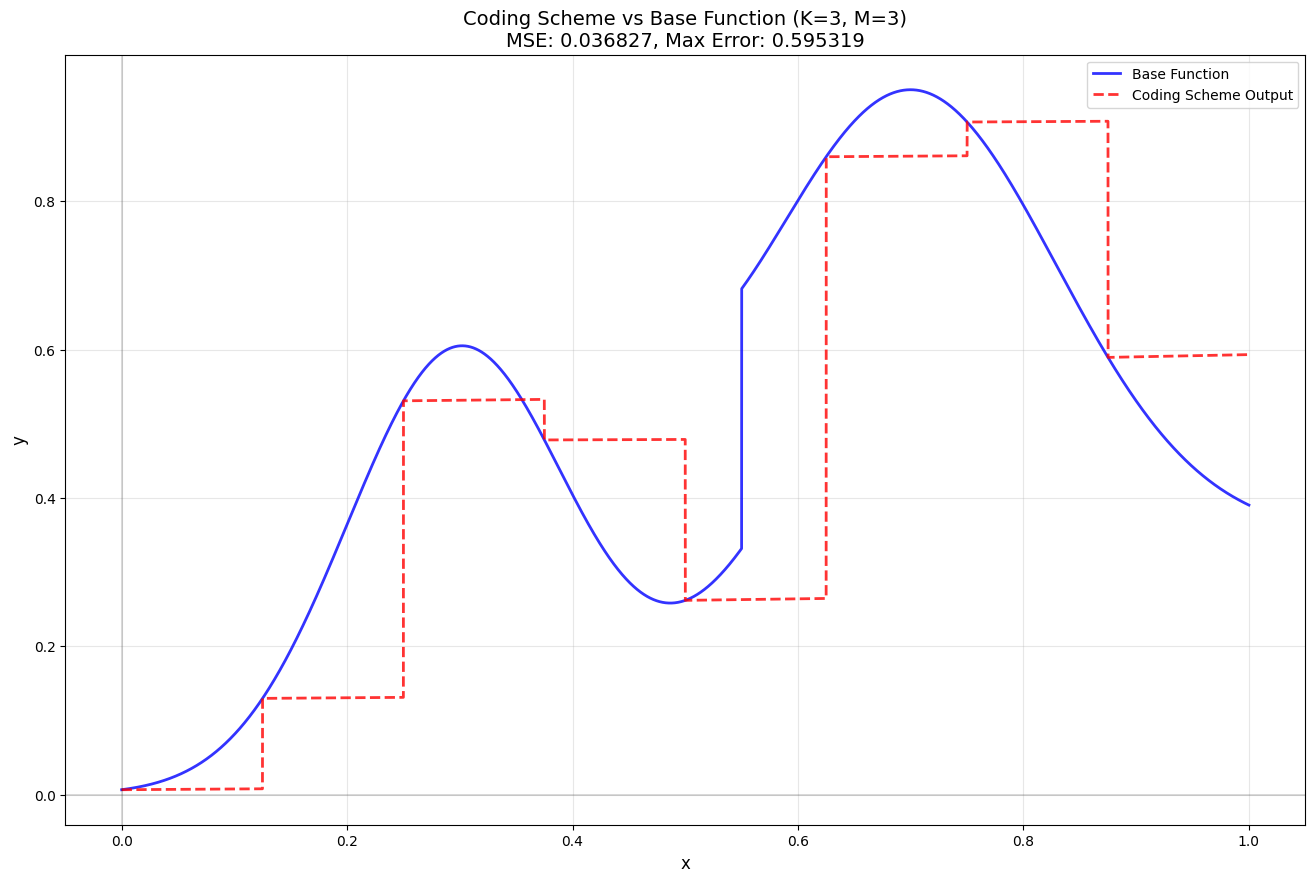

For Gaussian Mixture with Step Function with Sup Approximation with parameters K=3, M=3, gamma=0.01, flat_slope=0.001:
 - L2 error: 0.191904, Max error: 0.595319


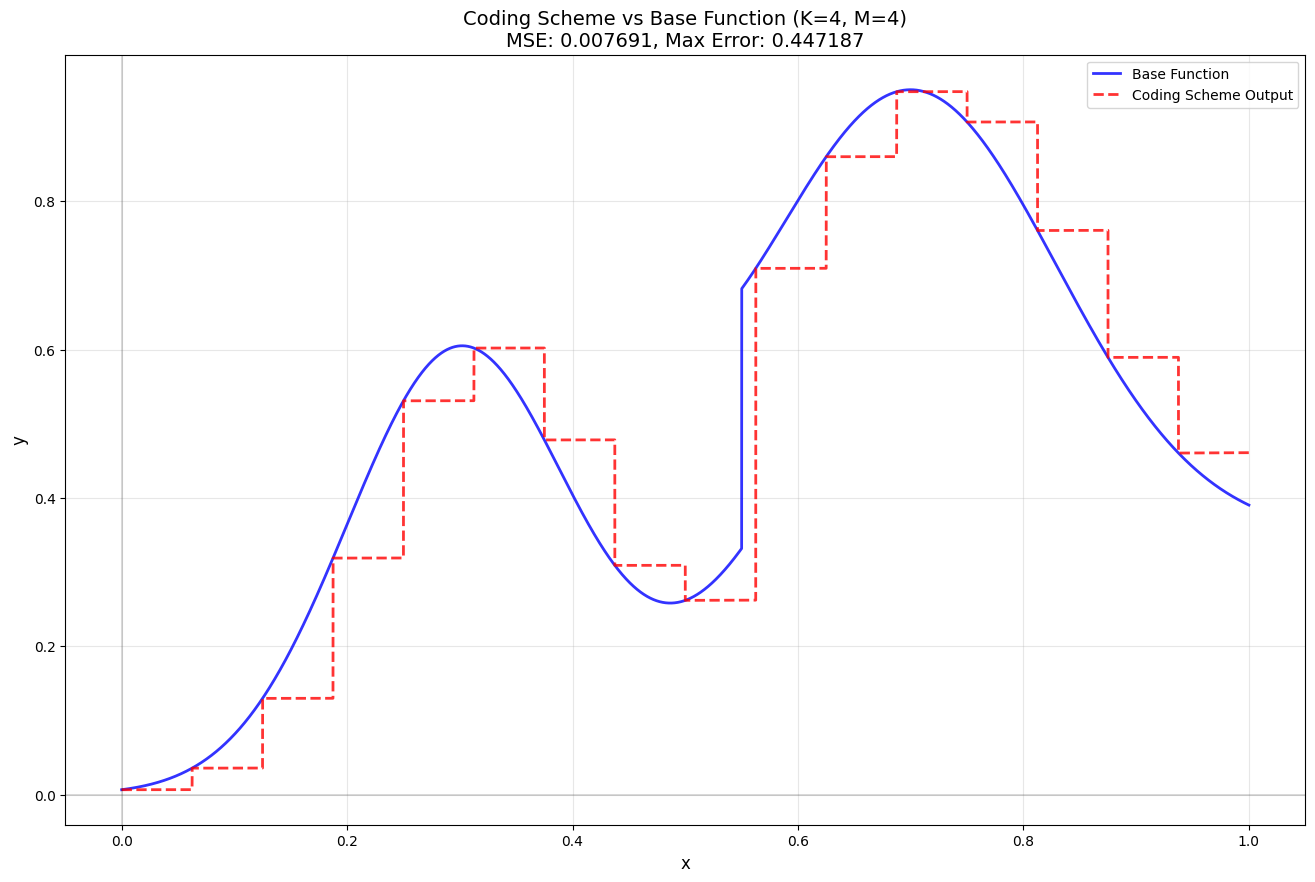

For Gaussian Mixture with Step Function with Sup Approximation with parameters K=4, M=4, gamma=0.001, flat_slope=0.0001:
 - L2 error: 0.087697, Max error: 0.447106


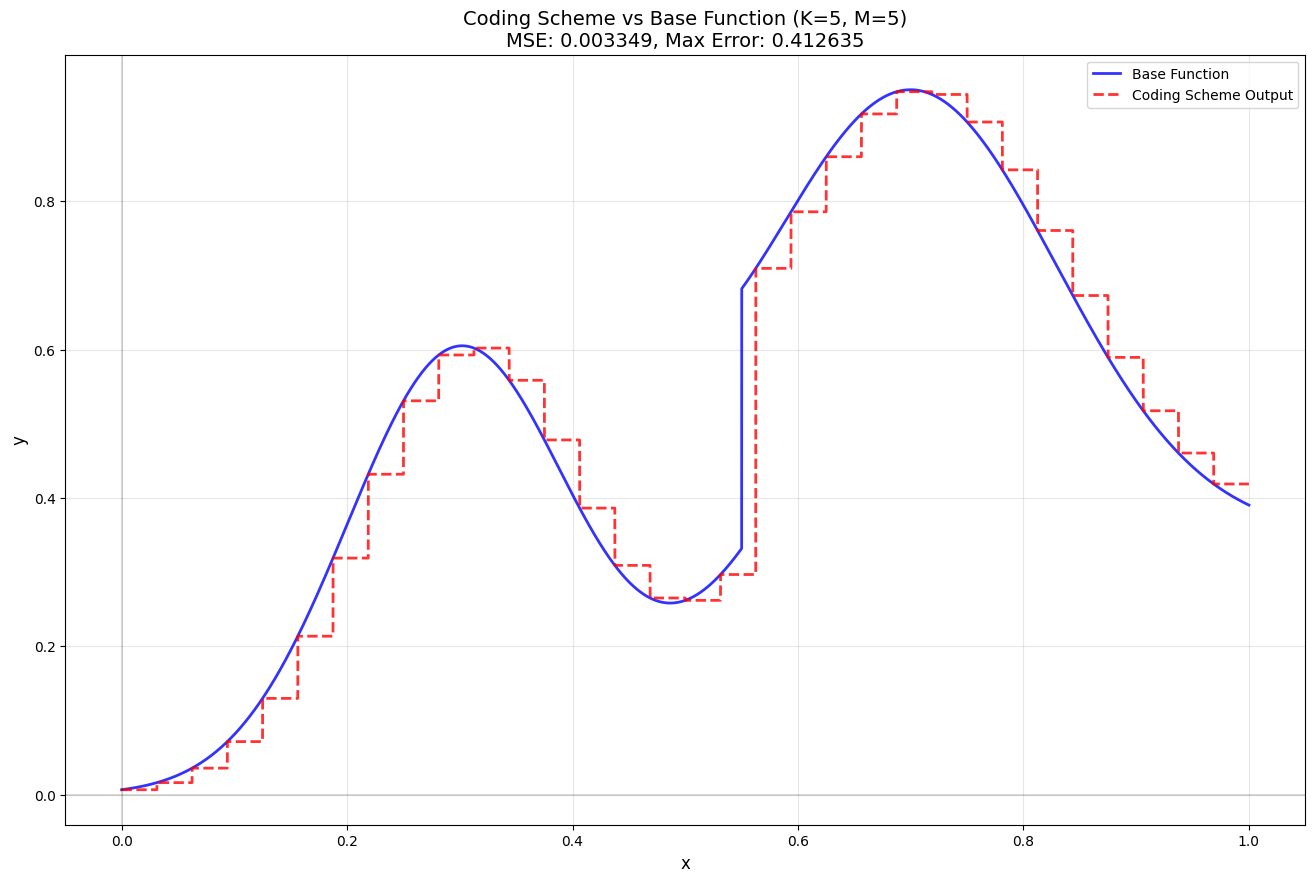

For Gaussian Mixture with Step Function with Sup Approximation with parameters K=5, M=5, gamma=0.0001, flat_slope=1e-05:
 - L2 error: 0.057873, Max error: 0.412554


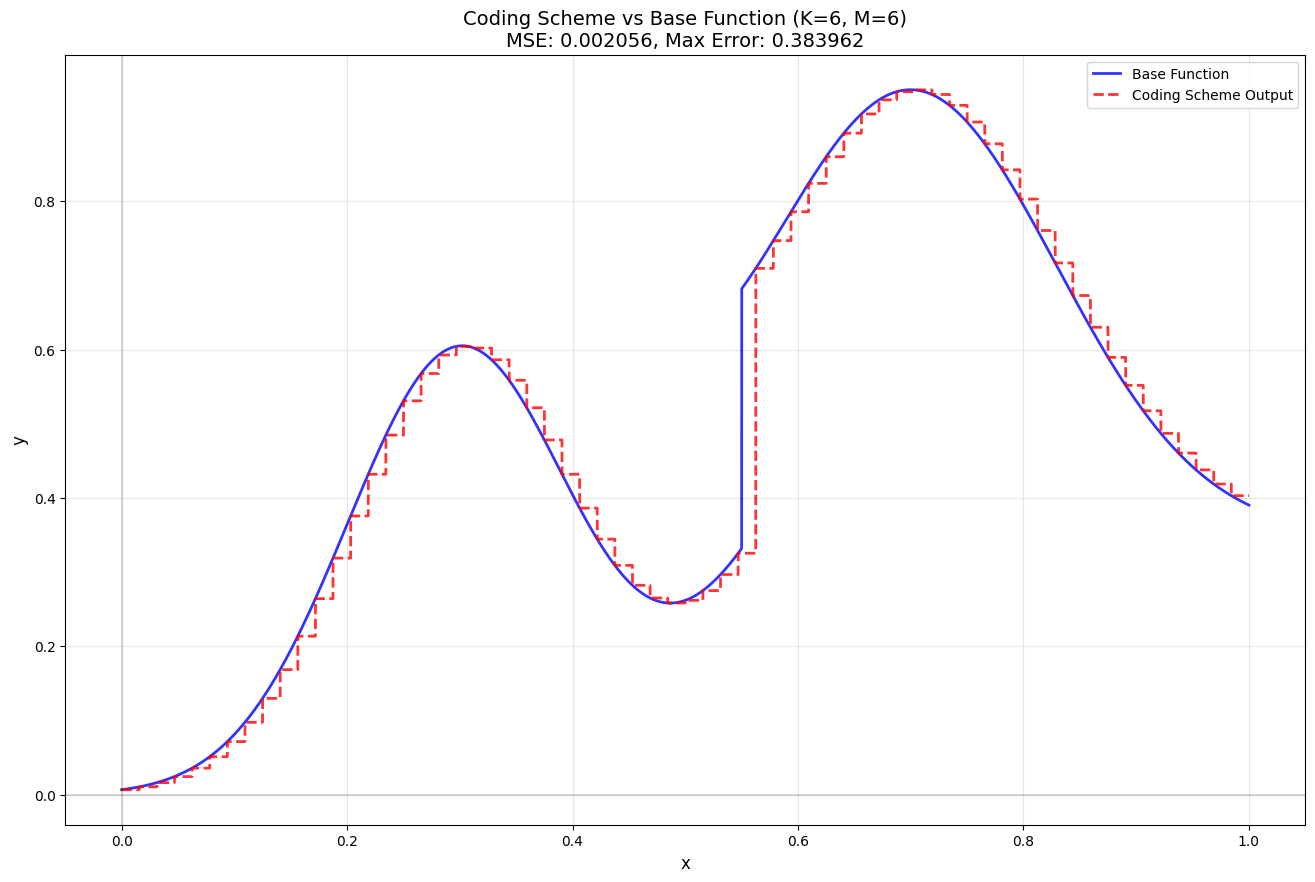

For Gaussian Mixture with Step Function with Sup Approximation with parameters K=6, M=6, gamma=1e-06, flat_slope=1e-06:
 - L2 error: 0.045348, Max error: 0.383881


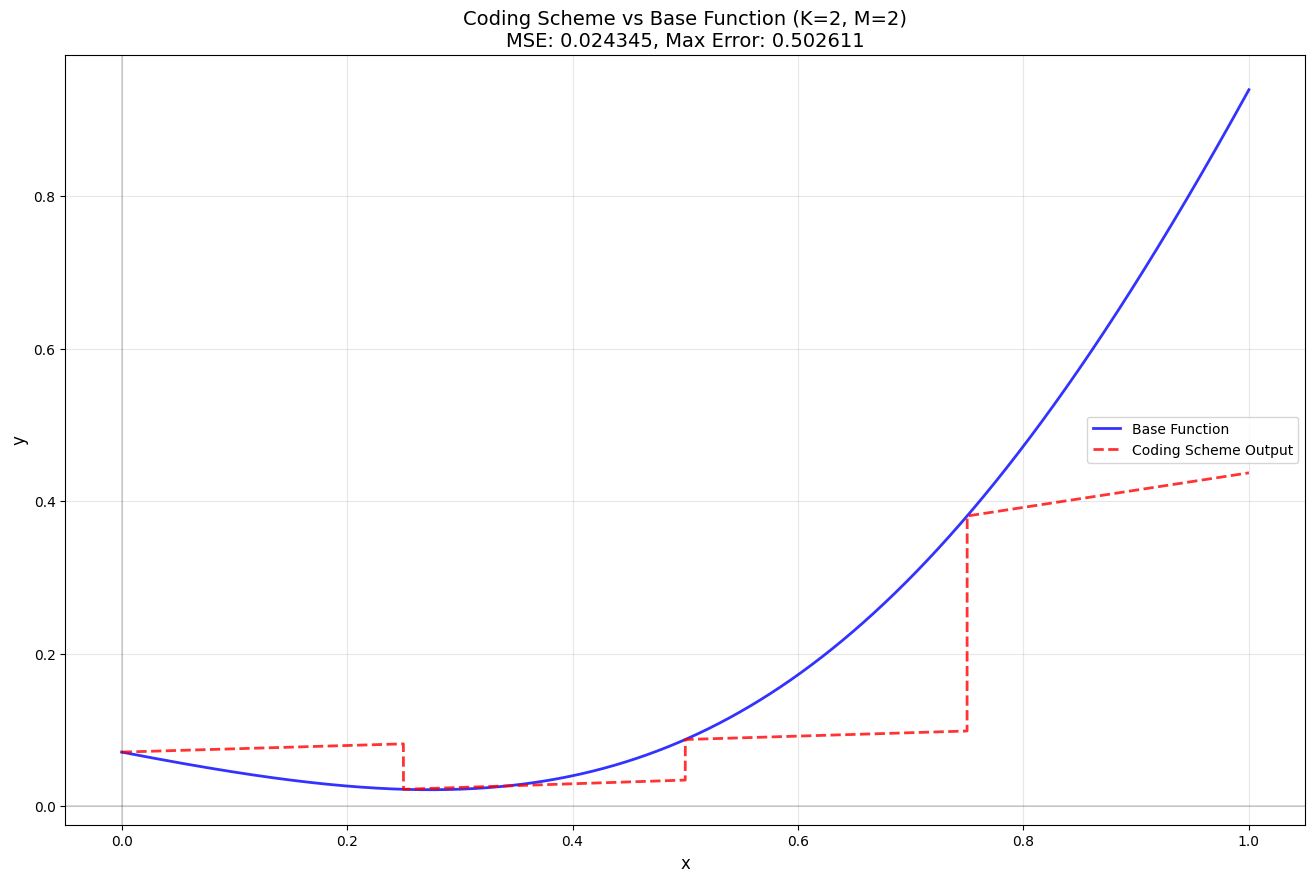

For Swish Shifted Function with Sup Approximation with parameters K=2, M=2, gamma=0.1, flat_slope=0.01:
 - L2 error: 0.156028, Max error: 0.502611


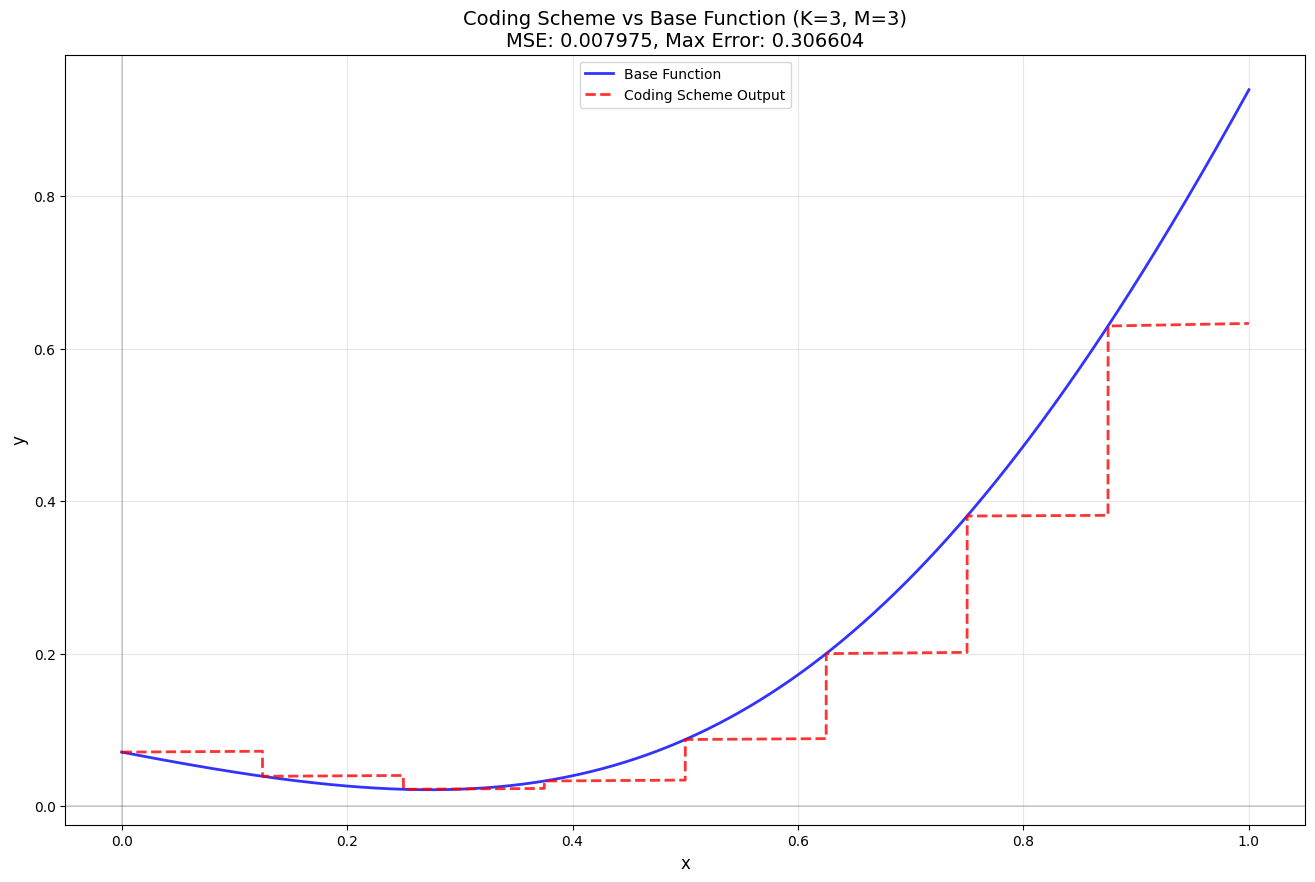

For Swish Shifted Function with Sup Approximation with parameters K=3, M=3, gamma=0.01, flat_slope=0.001:
 - L2 error: 0.089302, Max error: 0.306604


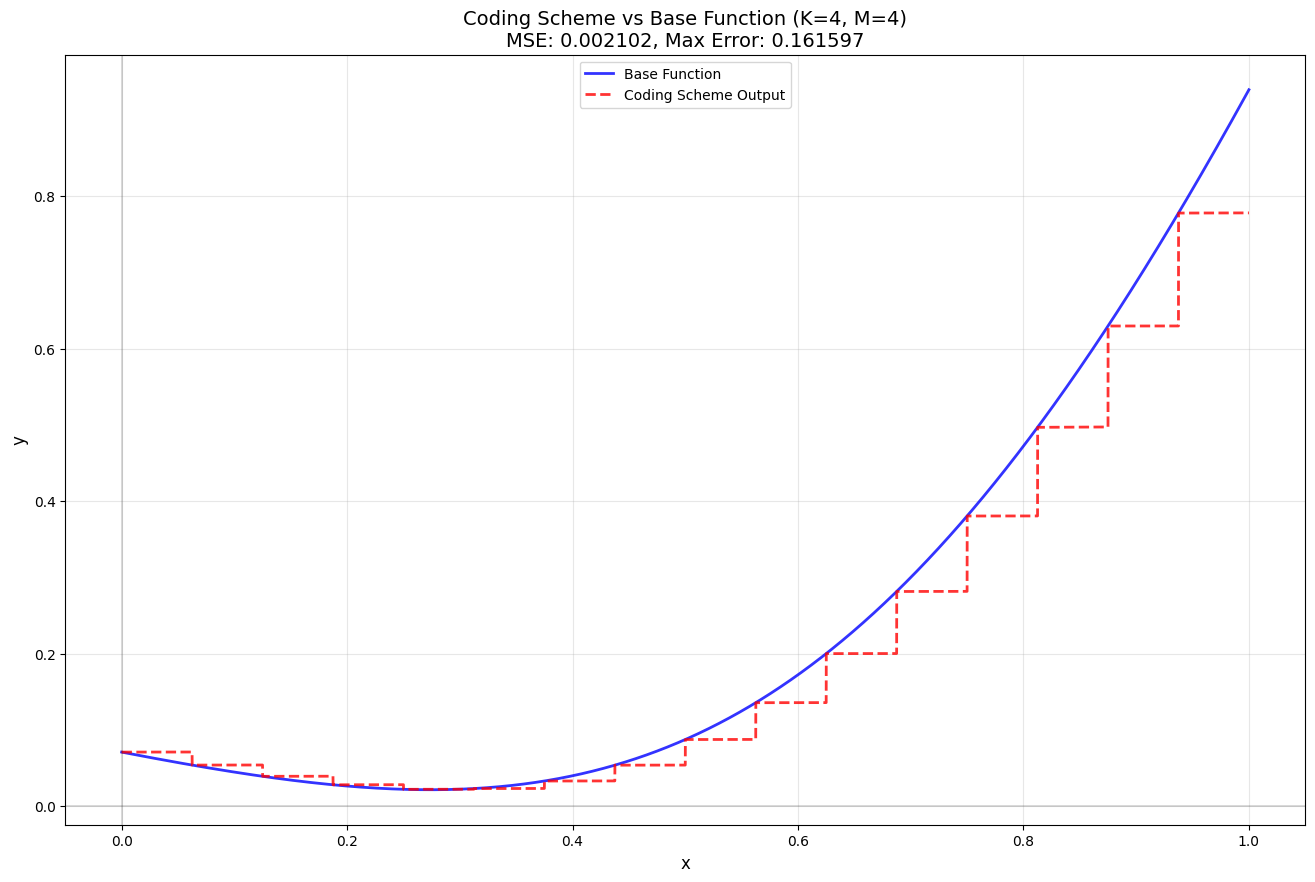

For Swish Shifted Function with Sup Approximation with parameters K=4, M=4, gamma=0.001, flat_slope=0.0001:
 - L2 error: 0.045882, Max error: 0.161597


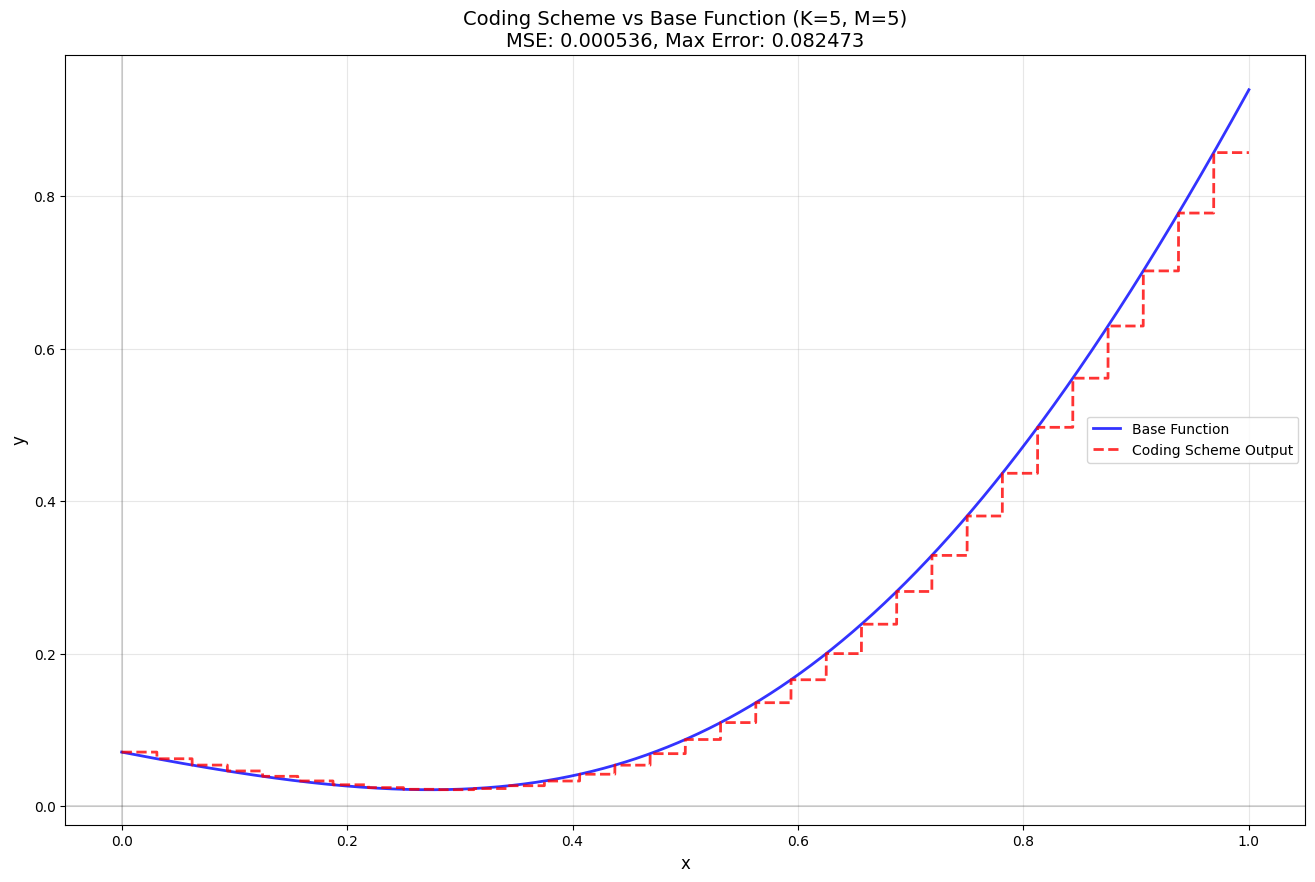

For Swish Shifted Function with Sup Approximation with parameters K=5, M=5, gamma=0.0001, flat_slope=1e-05:
 - L2 error: 0.023172, Max error: 0.082473


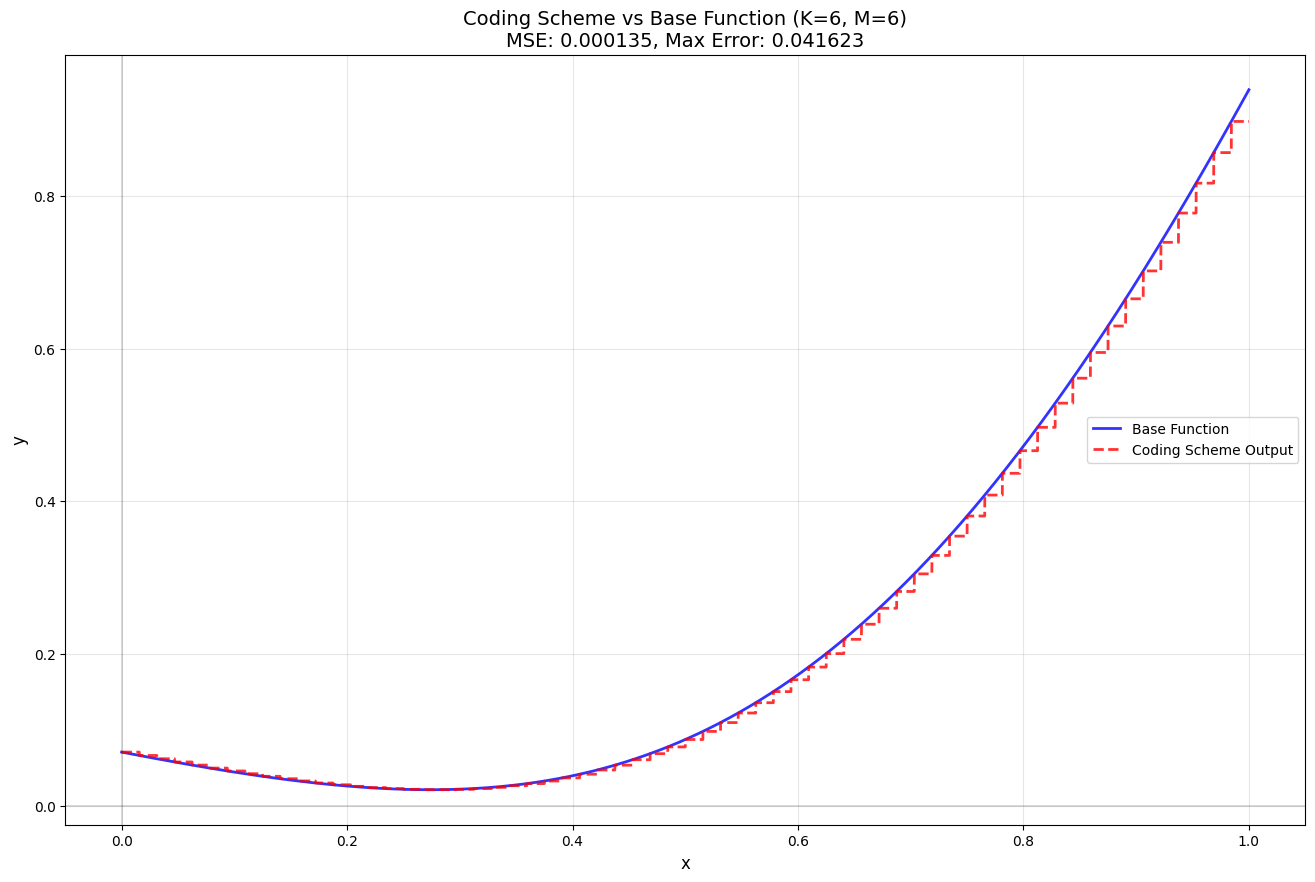

For Swish Shifted Function with Sup Approximation with parameters K=6, M=6, gamma=1e-06, flat_slope=1e-06:
 - L2 error: 0.011636, Max error: 0.041623


[(2, 2, 0.1, 0.01, 0.15602783612656493, 0.5026105420113708),
 (3, 3, 0.01, 0.001, 0.08930209990199316, 0.30660447121125967),
 (4, 4, 0.001, 0.0001, 0.04588184626211127, 0.1615973808382949),
 (5, 5, 0.0001, 1e-05, 0.02317181956088604, 0.08247296385546521),
 (6, 6, 1e-06, 1e-06, 0.011636080637195862, 0.04162327553318157)]

In [ ]:
input_params = [(2,2,0.1,1e-2), (3,3,0.01,1e-3), (4,4,0.001,1e-4), (5,5,0.0001,1e-5), (6,6,1e-6,1e-6)]
coding_scheme_sup_squared = CodingScheme1D(squared_shifted, dtype=dtype, device=device, scheme_type="sup")
coding_scheme_sup_squared.evaluate_for_list_of_parameters(input_params, "Squared Shifted Function with Sup Approximation", plot=True)
coding_scheme_sup_gaussian = CodingScheme1D(gaussian_mixture_with_step, dtype=dtype, device=device, scheme_type="sup")
coding_scheme_sup_gaussian.evaluate_for_list_of_parameters(input_params, "Gaussian Mixture with Step Function with Sup Approximation", plot=True)
coding_scheme_sup_swish = CodingScheme1D(swish_shifted, dtype=dtype, device=device, scheme_type="sup")
coding_scheme_sup_swish.evaluate_for_list_of_parameters(input_params, "Swish Shifted Function with Sup Approximation", plot=True)

In [14]:
# Example: Plot Lp and Max errors for different gammas and dtypes
# Define a simple test function
def test_function(x):
    return torch.sin(2 * torch.pi * x)

# Create coding scheme instance
coding_scheme = CodingScheme1D(test_function, K=3, M=2, gamma=0.01, flat_slope=1e-3)

# Define range of gamma values to test
gammas = torch.linspace(0.001, 0.03, 10)

# Plot errors vs gammas for both float32 and float64
results = coding_scheme.plot_Lp_and_max_norms_for_gammas(gammas, p=2)

ZeroDivisionError: float division by zero